In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, KFold, cross_val_score
seed = 10
num_folds=10
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import silhouette_score, mean_absolute_error
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from statsmodels.api import OLS

In [2]:
# Importing the data set
data = pd.read_csv('concrete.csv')
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
# meanings of independent variables:

# 0) cement: amount of cement added to the concrete in kg/m3
# 1) slag: is a component mixed with cement to increase it strength and resistance to chemical attacks
# 2) fly ash : it is another component added with cement to increase its properties
# 3) water: is also another component that is added with cement for hardening
# 4) superplastic: it is added with cement to control the compressive strength 
# 5) coarseagg: these are larger particles that are added to the concrete to reduce shrinkage. For eg: granules
# 6) fineagg: finen aggregates are components that are added aling with coarse aggregate to tackle shrinkage and reduce the overall
# amount of cement needed
# 7) age: It is the number of days they left the concrete to dry out, before the strength was measured

# Performing EDA

In [4]:
data.shape

(1030, 9)

In [5]:
data.dtypes
# All the data are of float except for 'age', which is of integer type

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [6]:
data.isnull().sum()
# no NAN entries

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [7]:
print("The number of null entries in: \n")
for i in data.columns:
    print("{} : {}".format(i,(data[i]==0).sum()))
    
# Although there are no null entries, the number of '0' entries is a lot. However, these 0's cannot be considered as null entries
# because it is possible that the amount of slag, super plastic and fly ash 'added' might actually be 'zero'

# Therefore NO ACTION is taken against these 'zero values'

The number of null entries in: 

cement : 0
slag : 471
ash : 566
water : 0
superplastic : 379
coarseagg : 0
fineagg : 0
age : 0
strength : 0


In [8]:
for i in data.columns:
    print("The Q1 of {} is {:.3f} \nThe Q2 of {} is {:.3f} \nThe Q3 of {} is {:.3f}\n".format(i,np.percentile(data[i],25),i,np.percentile(data[i],50),i,np.percentile(data[i],75)))

The Q1 of cement is 192.375 
The Q2 of cement is 272.900 
The Q3 of cement is 350.000

The Q1 of slag is 0.000 
The Q2 of slag is 22.000 
The Q3 of slag is 142.950

The Q1 of ash is 0.000 
The Q2 of ash is 0.000 
The Q3 of ash is 118.300

The Q1 of water is 164.900 
The Q2 of water is 185.000 
The Q3 of water is 192.000

The Q1 of superplastic is 0.000 
The Q2 of superplastic is 6.400 
The Q3 of superplastic is 10.200

The Q1 of coarseagg is 932.000 
The Q2 of coarseagg is 968.000 
The Q3 of coarseagg is 1029.400

The Q1 of fineagg is 730.950 
The Q2 of fineagg is 779.500 
The Q3 of fineagg is 824.000

The Q1 of age is 7.000 
The Q2 of age is 28.000 
The Q3 of age is 56.000

The Q1 of strength is 23.710 
The Q2 of strength is 34.445 
The Q3 of strength is 46.135



In [9]:
data.skew()

# Superplastic and slag seems to be somewhat skewed. 
# Age is highly skewed.
# Let's check about this more in the univariate analysis

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

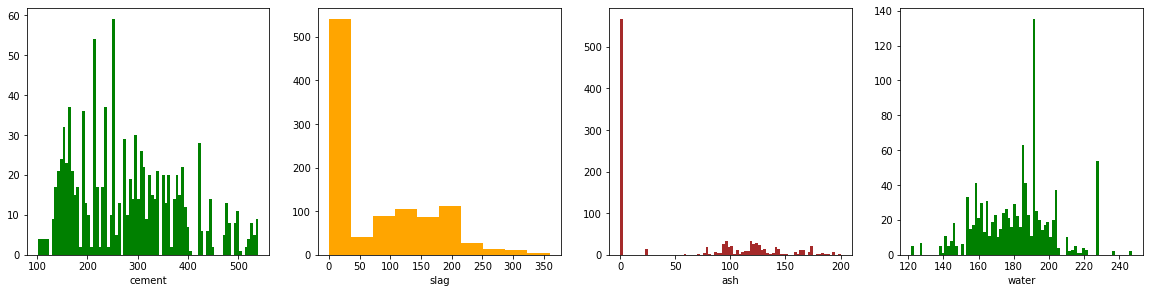

In [10]:
plt.figure(figsize=(20,10))

plt.subplot(2,4,1)
plt.hist(data['cement'],color='green',bins=80)
plt.xlabel('cement')

plt.subplot(2,4,2)
plt.hist(data['slag'],color='orange')
plt.xlabel('slag')

plt.subplot(2,4,3)
plt.hist(data['ash'],color='brown',bins=80)
plt.xlabel('ash')

plt.subplot(2,4,4)
plt.hist(data['water'],color='green',bins=80)
plt.xlabel('water')

plt.show()

# cement and water are somewhat normally distributed
# slag and ash are highly skewed toward the right, this is due to the fact that many of it's values are '0'

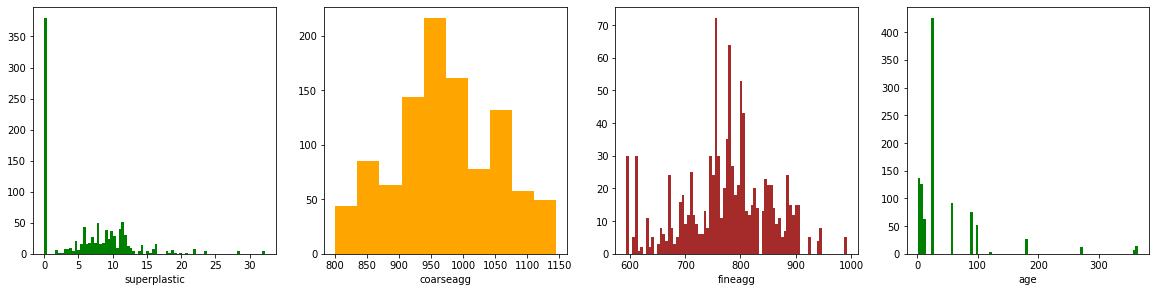

In [11]:
plt.figure(figsize=(20,10))

plt.subplot(2,4,1)
plt.hist(data['superplastic'],color='green',bins=80)
plt.xlabel('superplastic')

plt.subplot(2,4,2)
plt.hist(data['coarseagg'],color='orange')
plt.xlabel('coarseagg')

plt.subplot(2,4,3)
plt.hist(data['fineagg'],color='brown',bins=80)
plt.xlabel('fineagg')

plt.subplot(2,4,4)
plt.hist(data['age'],color='green',bins=80)
plt.xlabel('age')

plt.show()

# superplastic and age is highly skewed to the right
# coarseagg and fineagg is normally distributed

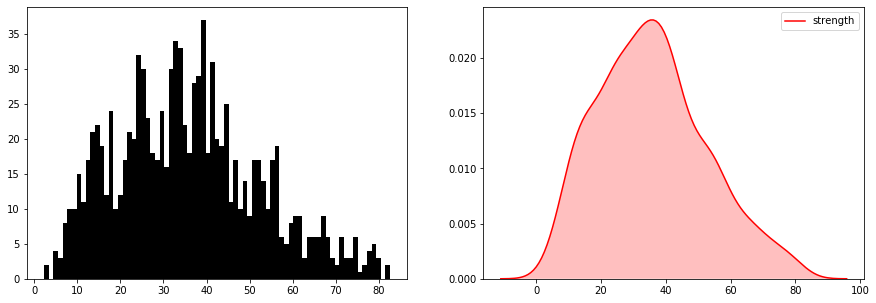

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(data['strength'],color='black',bins=75)


plt.subplot(1,2,2)
sns.kdeplot(data['strength'],color='red',shade=True)
plt.show()
# strength seems to be normally distributed

In [13]:
data_eda = data.copy()

In [14]:
for i in range(0,len(data_eda['age'])):
    if data_eda['age'][i]<=50:
        data_eda['age'][i]='Below 50'
    elif ((data_eda['age'][i]>50) & (data_eda['age'][i]<=100)):
        data_eda['age'][i]='50-100'
    elif ((data_eda['age'][i]>100) & (data_eda['age'][i]<=150)):
        data_eda['age'][i]='100-150'
    elif ((data_eda['age'][i]>150) & (data_eda['age'][i]<=200)):
        data_eda['age'][i]='150-200'
    elif ((data_eda['age'][i]>200) & (data_eda['age'][i]<=250)):
        data_eda['age'][i]='200-250'
    elif ((data_eda['age'][i]>250) & (data_eda['age'][i]<=300)):
        data_eda['age'][i]='250-300'
    elif ((data_eda['age'][i]>300) & (data_eda['age'][i]<=350)):
        data_eda['age'][i]='300-350'
    elif ((data_eda['age'][i]>350) & (data_eda['age'][i]<=400)):
        data_eda['age'][i]='350-400'

D:\Apps\bandi\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Apps\bandi\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
D:\Apps\bandi\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """

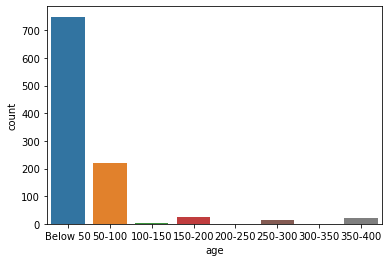

In [15]:
sns.countplot(data_eda['age'], order=['Below 50','50-100','100-150','150-200','200-250','250-300','300-350','350-400'])
plt.show()

# most of the concrete's strength are measured within less than '50 days'

In [16]:
data.describe().T

# The mean of slag is 73,and 3rd quartile is 142. however the max value is 359
# The mean of ash is 54,and 3rd quartile is 118. however the max value is 200
# The mean of superplastic is 6,and 3rd quartile is 10. however the max value is 32
# The mean of age is 45,and 3rd quartile is 56. however the max value is 365

# "which means there is presence of outliers"

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [17]:
data.std()

cement          104.506364
slag             86.279342
ash              63.997004
water            21.354219
superplastic      5.973841
coarseagg        77.753954
fineagg          80.175980
age              63.169912
strength         16.705742
dtype: float64

In [18]:
for i in data.columns:
    print("The mean and median of {} is {:.3f} & {} respectively\n".format(i,data[i].mean(),data[i].median()))

The mean and median of cement is 281.168 & 272.9 respectively

The mean and median of slag is 73.896 & 22.0 respectively

The mean and median of ash is 54.188 & 0.0 respectively

The mean and median of water is 181.567 & 185.0 respectively

The mean and median of superplastic is 6.205 & 6.4 respectively

The mean and median of coarseagg is 972.919 & 968.0 respectively

The mean and median of fineagg is 773.580 & 779.5 respectively

The mean and median of age is 45.662 & 28.0 respectively

The mean and median of strength is 35.818 & 34.445 respectively



In [19]:
data.corr()
# None of the independent attributes are highly correlated. Which is good news
# However, there are to attributes which are in "high" correlation with "strength" too

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


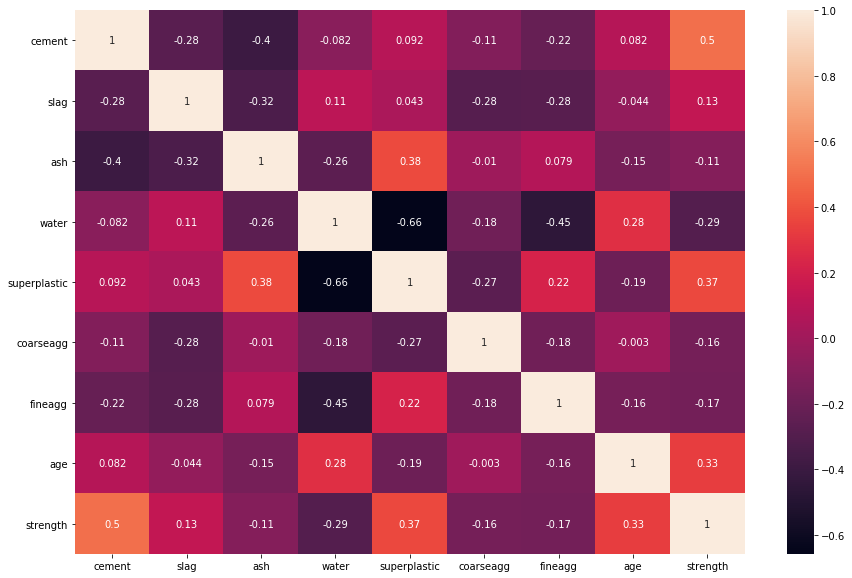

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

# no high correlated attributes
# The highest correlated attribute with 'strength' is 'cement' with a correlation of 0.50
# The second highest would be 'superplastic' with 0.37, followed by 'age' (0.33) and 'water' (0.29)

# Among the independent attributes, 'water' & 'superplastic' seem to be of (0.66), negative correlation
# 'fine agg' and 'water' seem to be negatively correlated (0.45)

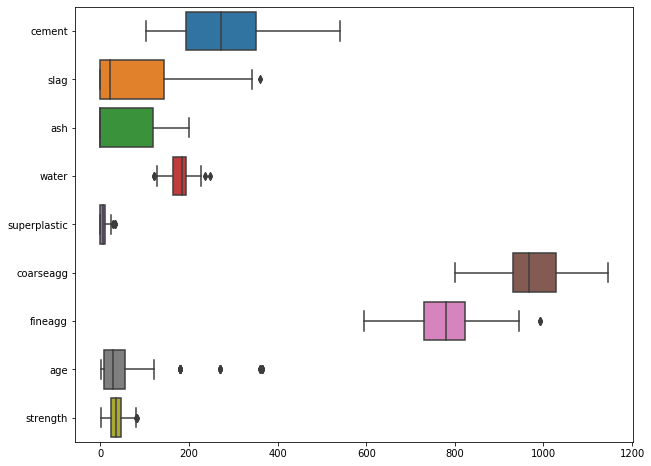

In [21]:
plt.figure(figsize=(10,8))
sns.boxplot(data=data,orient="h")
plt.show()

# Outliers are present in slag, water, superplastic, fineagg, age,strength.

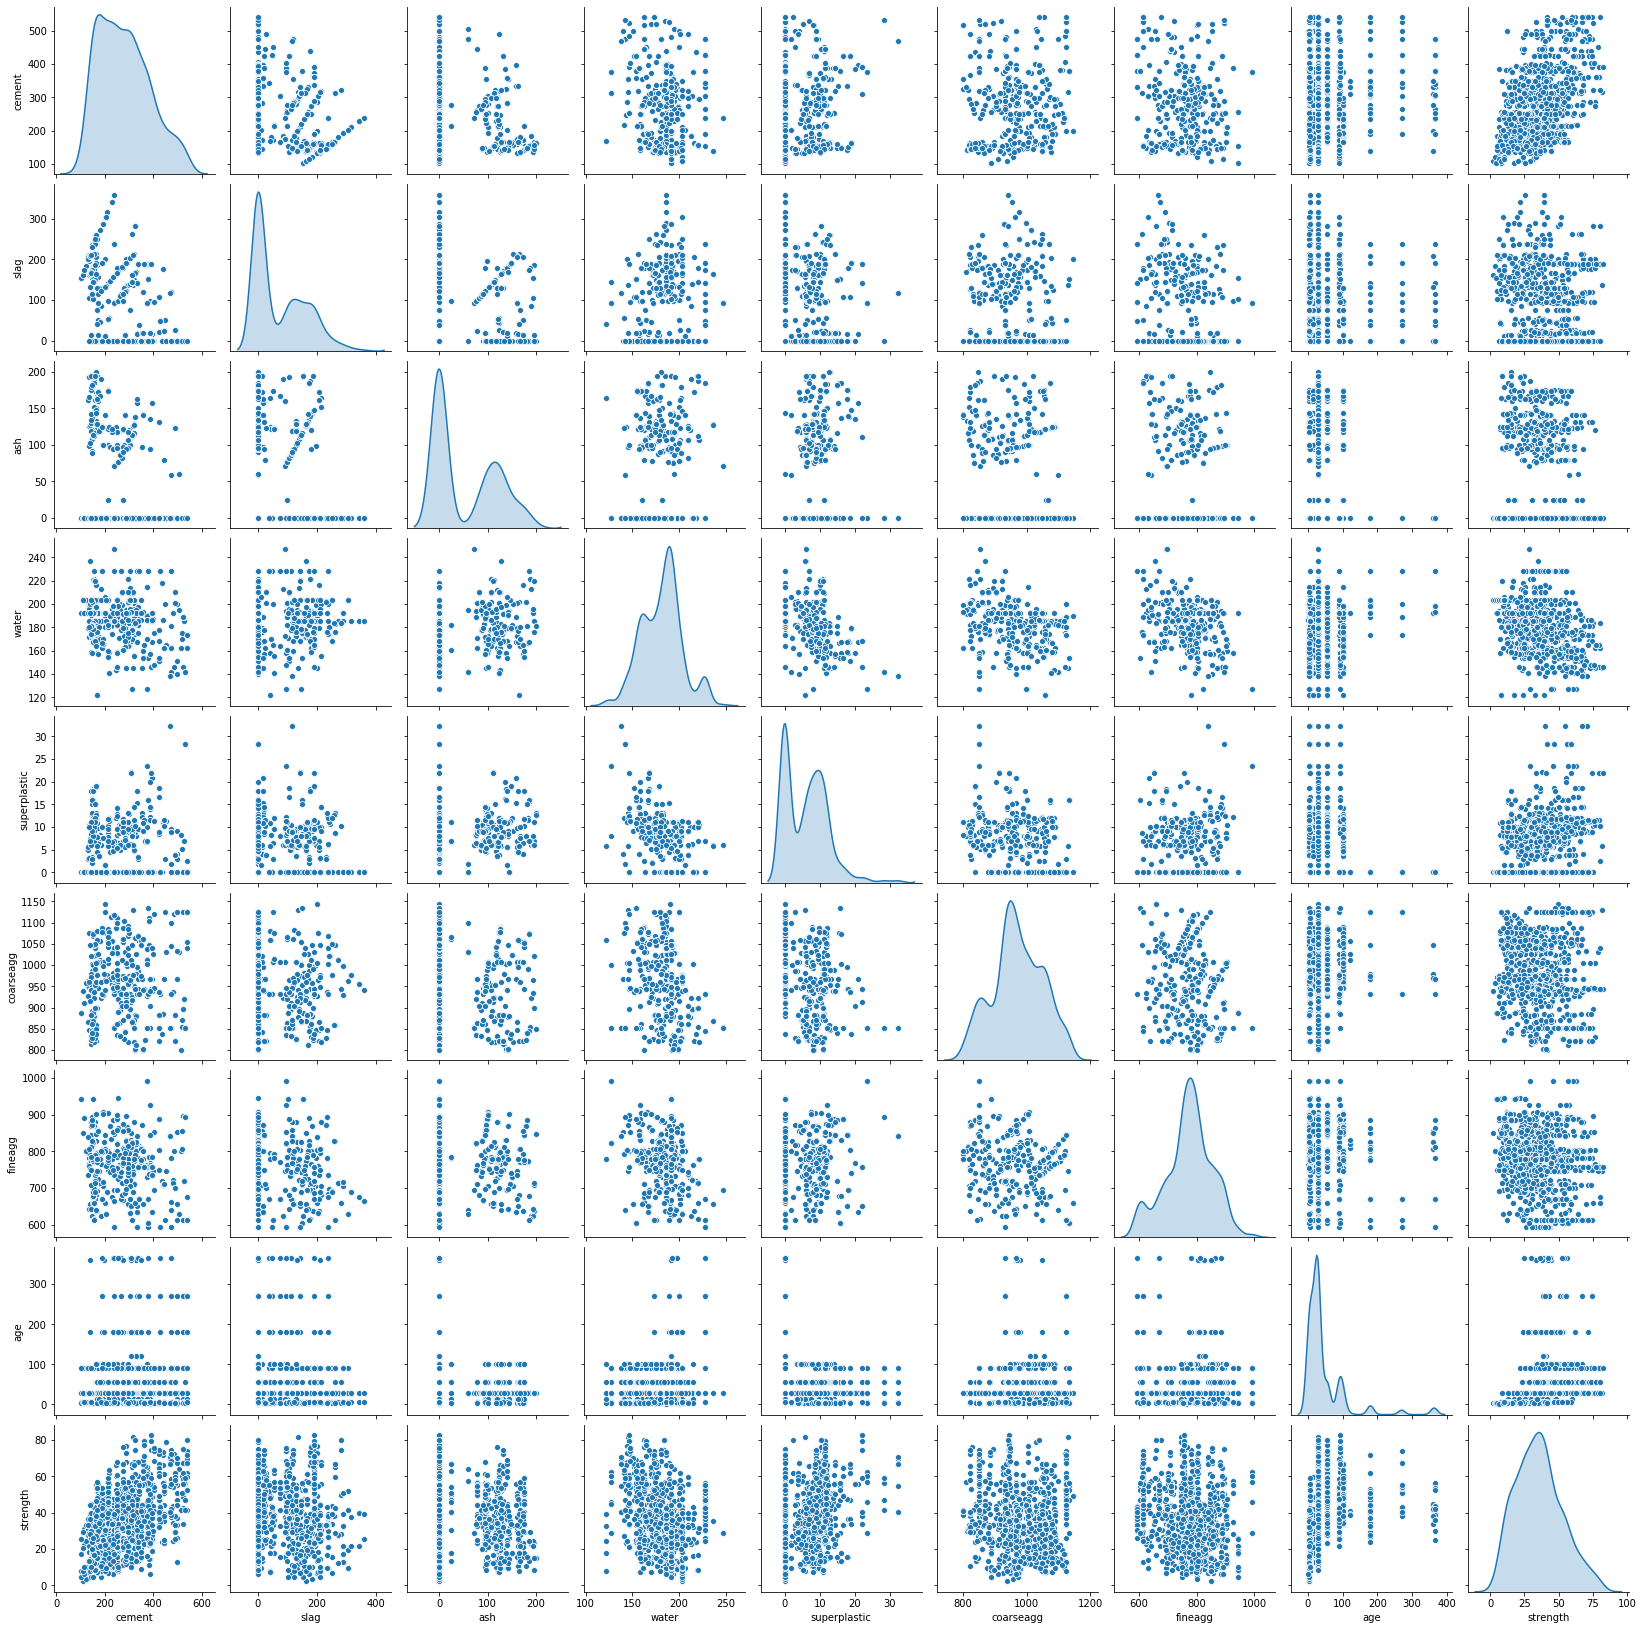

In [22]:
sns.pairplot(data,diag_kind='kde')
plt.show()

# From the scattered points from the below pair-plot, it is kind of clear that all the attributes are not so correlated at all.
# Amongst everything the highly correlated is cement & strength (0.5)

# Also there could be 3 - 15 clusters (there are 3 to 5 gaussians, as observed from the "diag_kde plot")

# Since there are no highly correlated attributes, i am concluding that all the attributes are to be kept for analysis

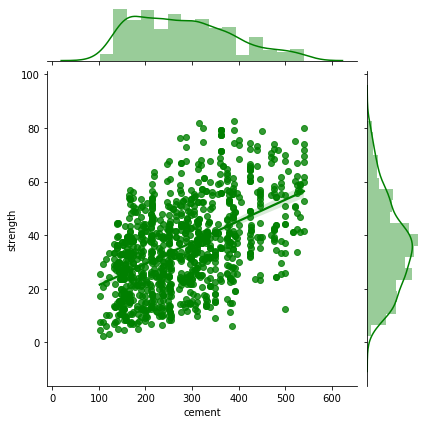

In [23]:
sns.jointplot('cement','strength',data=data,color='green',kind='reg')
plt.show()

# From the below scatter plot, It is clear that, "if more amount of cement is added, the strength is higher"
# In other words, compressive strength of concrete increases with increase in the amount of cement

# Treatment of Outliers

In [24]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3-Q1

In [25]:
data[((data < (Q1-1.5*IQR)) | (data>(Q3+1.5*IQR))).any(axis=1)]

# There are only 89 rows of outliers. 
# It is better to remove them off rather than corrupt the data with imputing the outliers with median values

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
44,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.20
51,331.0,0.0,0.0,192.0,0.0,978.0,825.0,180,39.00
64,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
66,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
93,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
...,...,...,...,...,...,...,...,...,...
995,380.0,0.0,0.0,228.0,0.0,932.0,670.0,365,52.52
1003,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56,80.20
1017,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,180,44.21
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30


In [26]:
cleandf = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
cleandf.shape

# removing off the values from data which are lesser than "1.5 times the IQR" from "1st quartile" and 
# greater than "1.5 times IQR" from the "3rd quartile"

# which removes off 89 rows. 

(941, 9)

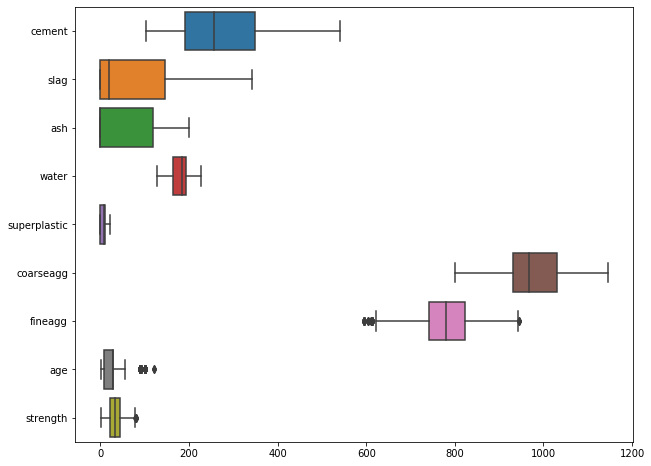

In [27]:
plt.figure(figsize=(10,8))
sns.boxplot(data=cleandf,orient="h")
plt.show()

# The cleaned data and is free of old outliers. 
# However, new outliers are formed

In [28]:
cleandf.describe().T

# Now there is no significant difference between the 75% value and "max" value, as when observed without removing outliers

,count,mean,std,min,25%,50%,75%,max
cement,941.0,275.765250,101.888133,102.00,190.30,255.5,349.00,540.0
slag,941.0,73.860680,86.357928,0.00,0.00,20.0,145.00,342.1
ash,941.0,58.019979,64.363959,0.00,0.00,0.0,118.30,200.1
water,941.0,180.618066,18.748963,127.00,164.90,183.8,192.00,228.0
superplastic,941.0,6.247396,5.340911,0.00,0.00,7.0,10.30,22.1
coarseagg,941.0,974.808289,77.646578,801.00,932.00,968.0,1031.00,1145.0
fineagg,941.0,776.551860,75.075034,594.00,741.00,780.0,822.20,945.0
age,941.0,32.376196,28.558690,1.00,7.00,28.0,28.00,120.0
strength,941.0,34.887641,16.592538,2.33,22.63,33.4,44.64,79.4


In [29]:
data_fin = cleandf.copy()
data_fin.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [30]:
data_fin['coarseagg_perkg_of_fineagg'] = data['coarseagg']/data['fineagg']

# since coarse_agg and fine_agg are mixed as an additional compound to fill in the air gaps,
# we can create a composite data, which is a combination of coarseagg and finagg
# It means that, the amount of coarsgeagg added "per kg" of fineagg

In [31]:
data = data_fin.copy()
data = data.drop({'coarseagg','fineagg'},axis=1)

In [32]:
z = data['strength']
data = data.drop('strength',axis=1)
data['strength']=z

In [33]:
data = data.reset_index()
data.drop({'index'},inplace=True,axis=1)
data.head()

,cement,slag,ash,water,superplastic,age,coarseagg_perkg_of_fineagg,strength
0,141.3,212.0,0.0,203.5,0.0,28,1.298330,29.89
1,168.9,42.2,124.3,158.3,10.8,14,1.357448,23.51
2,250.0,0.0,95.7,187.4,5.5,28,1.111124,29.22
3,266.0,114.0,0.0,228.0,0.0,28,1.391045,45.85
4,154.8,183.4,0.0,193.3,9.1,28,1.503373,18.29


In [34]:
# For the complexity of the model, a simple linear model would do.

In [35]:
ss1 = StandardScaler()
data_scaled = ss1.fit_transform(data)

In [36]:
from sklearn.cluster import KMeans
cluster_range = range(3,16)   
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5,random_state=seed)
    clusters.fit(data_scaled)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

# From the below data on interia it is clear that the amount of error reduces significantly from 3 to 8. 
# However, after 8,  the inertia is reducing in very small amounts. 
# Hence, we can take the number of clusters to be 8

,num_clusters,cluster_errors
0,3,4957.325685
1,4,4309.993113
2,5,3898.941009
3,6,3616.441448
4,7,3383.037800
5,8,3090.333023
6,9,2922.667031
7,10,2763.261379
8,11,2620.133352
9,12,2502.652659


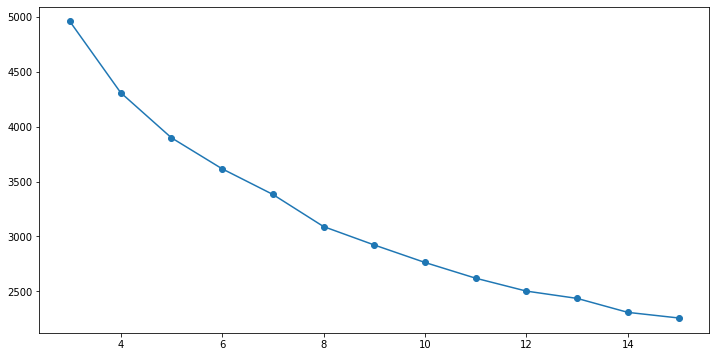

In [37]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

# from the below graph it can be seen that the 'arm' bend is around 8. Hence let us try with  8clusters

In [38]:
cluster = KMeans( n_clusters = 8, random_state = seed )
cluster.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [39]:
pd.DataFrame(cluster.cluster_centers_,columns=data.columns)

,cement,slag,ash,water,superplastic,age,coarseagg_perkg_of_fineagg,strength
0,1.827938,-0.202363,-0.849063,-0.224333,-0.357855,-0.059225,2.808816,0.966718
1,-0.570946,-0.012127,0.937661,0.648861,0.226899,-0.212674,-0.272337,-0.346929
2,-0.791717,1.361714,-0.888505,0.625995,-0.730773,-0.522656,0.180831,-0.692073
3,1.032841,0.533465,-0.547342,-0.883020,0.956609,0.052397,-0.607144,1.269804
4,0.595541,-0.817042,-0.836880,0.627287,-1.099492,-0.563003,0.162576,-0.669755
5,-0.404638,-0.650872,1.138279,-0.867262,0.781306,-0.549316,-0.063396,-0.429759
6,0.010467,0.113028,-0.827733,1.067291,-1.081901,2.034887,0.004062,0.321848
7,-0.551169,-0.607974,1.035652,-0.773296,0.431355,1.650946,-0.009493,0.752859


In [40]:
prediction=cluster.predict(data_scaled)
data["GROUP"] = prediction
data

,cement,slag,ash,water,superplastic,age,coarseagg_perkg_of_fineagg,strength,GROUP
0,141.3,212.0,0.0,203.5,0.0,28,1.298330,29.89,2
1,168.9,42.2,124.3,158.3,10.8,14,1.357448,23.51,5
2,250.0,0.0,95.7,187.4,5.5,28,1.111124,29.22,1
3,266.0,114.0,0.0,228.0,0.0,28,1.391045,45.85,2
4,154.8,183.4,0.0,193.3,9.1,28,1.503373,18.29,2
...,...,...,...,...,...,...,...,...,...
936,141.3,212.0,0.0,203.5,0.0,7,1.298330,10.39,2
937,297.2,0.0,117.5,174.8,9.5,3,1.357399,21.91,5
938,135.0,0.0,166.0,180.0,10.0,28,1.193789,13.29,5
939,276.4,116.0,90.3,179.6,8.9,28,1.132500,44.28,1


# CLUSTER ANALYSIS

In [41]:
data.groupby("GROUP").mean()
# Group 0 has the highest cement level, and is higher strength as well
# Group 2 has low cemnt content and low strength also

# Let us see more in details about the clusters

,cement,slag,ash,water,superplastic,age,coarseagg_perkg_of_fineagg,strength
GROUP,,,,,,,,
0,461.911429,56.394286,3.400000,176.414286,4.337143,30.685714,1.769694,50.919429
1,217.623567,72.814013,118.339490,192.777070,7.458599,26.305732,1.220918,29.134268
2,195.141549,191.392958,0.862676,192.348592,2.346479,17.457746,1.301630,23.410493
3,380.943590,119.905128,22.809615,164.071154,11.353846,33.871795,1.161286,55.945705
4,336.411565,3.340136,4.183673,192.372789,0.378231,16.306122,1.298379,23.780612
5,234.559355,17.682581,131.245161,164.366452,10.418065,16.696774,1.258132,27.760645
6,276.831148,83.616393,4.772131,200.618033,0.472131,90.459016,1.270146,40.225082
7,219.637500,21.385227,124.643182,166.127273,8.550000,79.500000,1.267732,47.372841


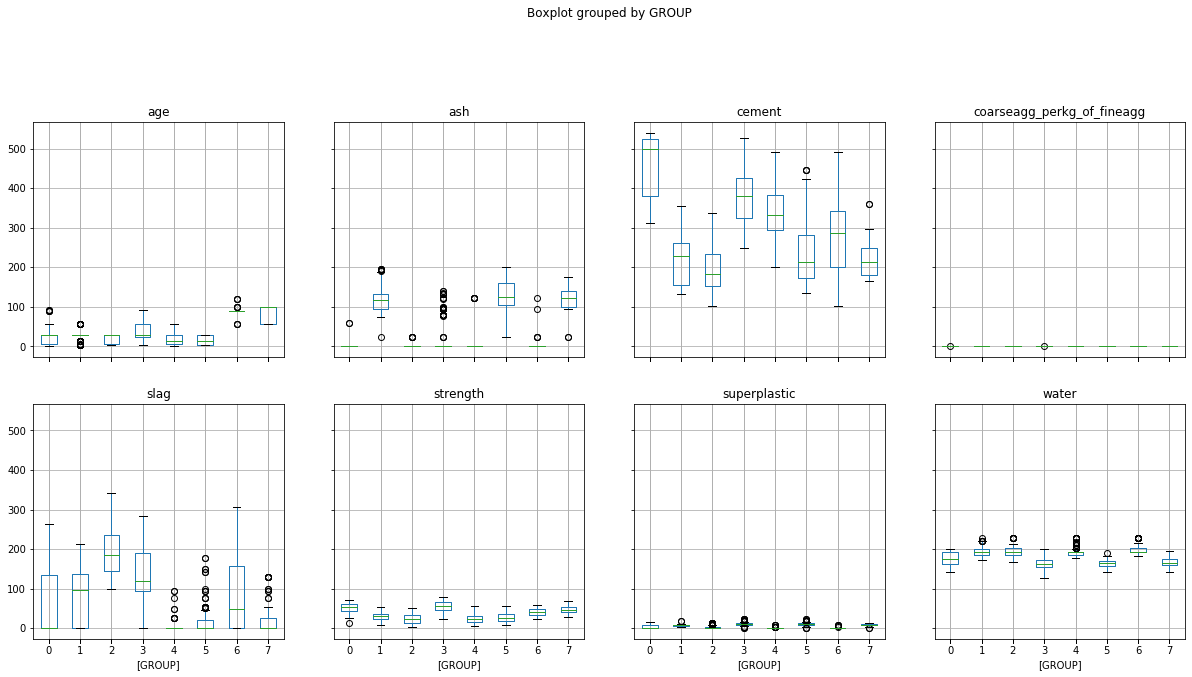

In [42]:
data.boxplot(by = 'GROUP',  layout=(4,4), figsize=(20, 20))
plt.show()

In [43]:
X = pairwise_distances(data.iloc[:,0:-1])
metrics.silhouette_score(X,cluster.labels_)
# The value is very close to '0' which means that there are over-lapping clusters. 
# However, since the silhouette score isn't negative, we can get releived of the fact that there are no points that a classified 
# under the wrong group

0.08024577879816629

In [44]:
data.GROUP.value_counts(sort=False)

0     35
1    157
2    142
3    156
4    147
5    155
6     61
7     88
Name: GROUP, dtype: int64

<Figure size 6480x4680 with 0 Axes>

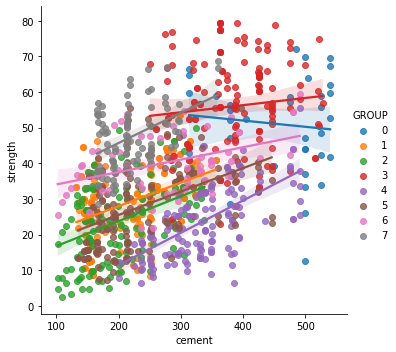

In [104]:
plt.figure(figsize=(90,65))
sns.lmplot(x='cement',y='strength',data=data,hue='GROUP')
plt.show()

# It can be seen that, Group 4 can predict the strength well (a perfect linear line)
# Group 1, 2, 5, 6, 7 gaussians are highly overlapping with eachother
# group 0 has very high variaance and is scattered. 
# Group 0 & group 3 have high strength and high cement content
# Group 3 line is almost horizontal, which means it is a poor predictor of strength
# Group 2 has low cement and low strength content

<Figure size 6480x4680 with 0 Axes>

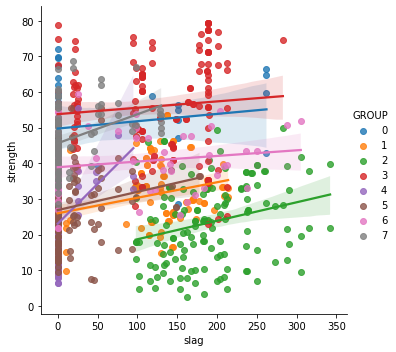

In [106]:
plt.figure(figsize=(90,65))
sns.lmplot(x='slag',y='strength',data=data,hue='GROUP')
plt.show()


# Except for group 2, 4 and group 7, almost all the lines are "horizontal", 
# which means "slag" itself is not much of a good predictor

# Group 2 has very high variance. Group 1 is biased towards '0'

<Figure size 6480x4680 with 0 Axes>

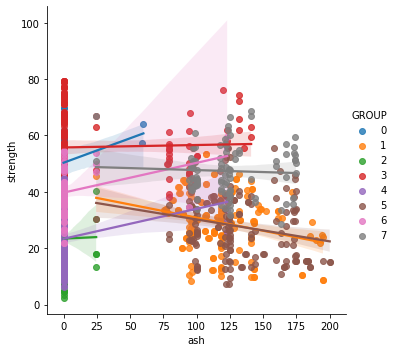

In [105]:
plt.figure(figsize=(90,65))
sns.lmplot(x='ash',y='strength',data=data,hue='GROUP')
plt.show()


# Group 3 has high strength 
# Group 3 line is horizontal. Hence it is a bad predictor of strength

# group 1,5,7 have high ash content, however the gaussians over lap eachother. The variance is very high

# Group 4, 6 have high bias towards '0'

# This all the clusters in general have high variance

<Figure size 6480x4680 with 0 Axes>

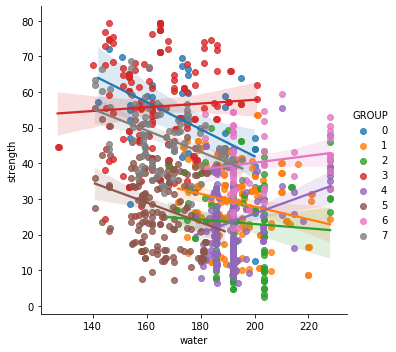

In [103]:
plt.figure(figsize=(90,65))
sns.lmplot(x='water',y='strength',data=data,hue='GROUP')
plt.show()

# clusters with high water content have low compressive strength.
# Group 5 seems to a better predictor. 

# Group 1, 2, 4, 6 are overlapping clusters. They belong to the "high water" content zone

# Group 0, 3 have high strength and low water content. Howevwer,0&3 overlap eachother
# Group 3 line is almost horizontal, which means it is a bad predictor of strength

# Whereas group 0 & 7 seem to be a good predictor

<Figure size 6480x4680 with 0 Axes>

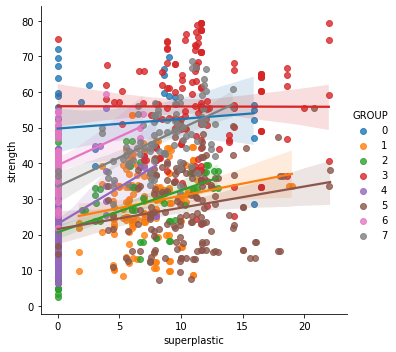

In [108]:
plt.figure(figsize=(90,65))
sns.lmplot(x='superplastic',y='strength',data=data,hue='GROUP')
plt.show()

# Group 0, 3 are horizontal. Which means they are a very bad predictor of strength

# Group 7 seems to be a good predictor of strength

# Group 1, 5, 2 seem to have very high variance and overlap eachother

<Figure size 6480x4680 with 0 Axes>

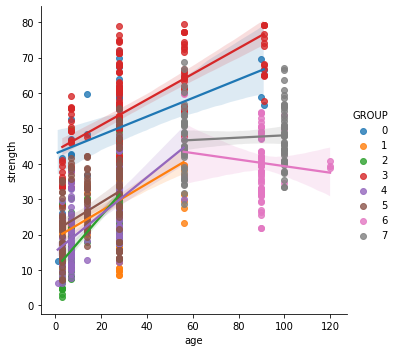

In [109]:
plt.figure(figsize=(90,65))
sns.lmplot(x='age',y='strength',data=data,hue='GROUP')
plt.show()

# All the group in the age vs strength predictor have very very high variance, which may result in poor prediction

# But it can bee seen that, higher the age, high the average compressive strength 

<Figure size 6480x4680 with 0 Axes>

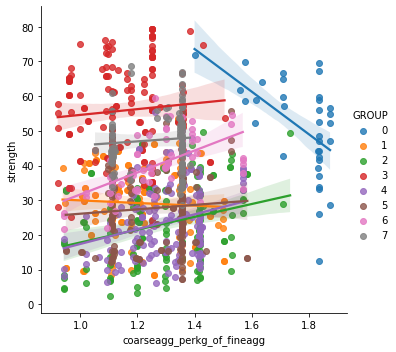

In [111]:
plt.figure(figsize=(90,65))
sns.lmplot(x='coarseagg_perkg_of_fineagg',y='strength',data=data,hue='GROUP')
plt.show()

# Group 3, 7, 1, 5 all have almost horizontal lines. Hence they are poor predictors of strength

# Group 6, 0 seems to be a good predictor of strength

# Group 2 and 4 have very high variance and the overlap eachother

# Groups with high strength have high coarse_agg /- kg of fine_agg ratio
# Groups with low coarse_agg/fine_agg ratio have low strength

In [45]:
data.head(10)

,cement,slag,ash,water,superplastic,age,coarseagg_perkg_of_fineagg,strength,GROUP
0,141.3,212.0,0.0,203.5,0.0,28,1.298330,29.89,2
1,168.9,42.2,124.3,158.3,10.8,14,1.357448,23.51,5
2,250.0,0.0,95.7,187.4,5.5,28,1.111124,29.22,1
3,266.0,114.0,0.0,228.0,0.0,28,1.391045,45.85,2
4,154.8,183.4,0.0,193.3,9.1,28,1.503373,18.29,2
5,255.0,0.0,0.0,192.0,0.0,90,0.941587,21.86,6
6,166.8,250.2,0.0,203.5,0.0,7,1.408605,15.75,2
7,251.4,0.0,118.3,188.5,6.4,56,1.357265,36.64,1
8,296.0,0.0,0.0,192.0,0.0,28,1.418301,21.65,4
9,155.0,184.0,143.0,194.0,9.0,28,1.258941,28.99,1


In [46]:
X = data.iloc[:,0:-2].values
Y = data.iloc[:,-2].values

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=seed,test_size=0.3)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)

# LINEAR REGRESSION

In [48]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
X_test_scaled = ss.transform(X_test)
lr.score(X_test_scaled,y_test)

0.7698899896131519

In [51]:
lr.score(X_train_scaled,y_train)

0.76668312368894

In [49]:
for i in range(0,len(list(data.columns)[0:-2])):
      print("The coefficient of {} is {:.2f}".format(list(data.columns)[0:-2][i],list(lr.coef_)[i]))

print("\nThe intercept is {0:.2f}".format(lr.intercept_))

# The model doesn't seem to be over fit. Hence A simple linear model is ideal for performing prediction.

# The feature importance obtained accoring to Linear Regresion, cement, slag and age have high importance, 
# however, superplastic and coarseagge_perkg_of_fineagg have least importance

The coefficient of cement is 11.90
The coefficient of slag is 7.72
The coefficient of ash is 4.59
The coefficient of water is -3.50
The coefficient of superplastic is 1.07
The coefficient of age is 8.95
The coefficient of coarseagg_perkg_of_fineagg is -0.30

The intercept is 35.22


In [126]:
y_pred = lr.predict(X_test_scaled)
mse = mean_squared_error
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test)))
print("The R-squared value is ",r2_score(y_pred,y_test))

The RMSE score is  8.156183934604678
The R-squared value is  0.722086962642168


# RIDGE

In [127]:
Ridge = Ridge(alpha=20)
Ridge.fit(X=X_train_scaled,y= y_train)
Ridge.score(X_test_scaled,y_test)

0.7757692628347718

In [136]:
for i in range(0,len(list(data.columns)[0:-2])):
      print("The coefficient of {} is {:.2f}".format(list(data.columns)[0:-2][i],list(Ridge.coef_)[i]))

# The coef_ seems to be "suppressed" when comapred with lineara regression
# Like linear regression, Ridge coeeficients also say that, coarseagg_perkg and superplastic have the least importance

# cement, slag, ash, age, water have high importance

The coefficient of cement is 10.86
The coefficient of slag is 6.77
The coefficient of ash is 3.54
The coefficient of water is -3.29
The coefficient of superplastic is 1.76
The coefficient of age is 8.63
The coefficient of coarseagg_perkg_of_fineagg is -0.07


In [130]:
y_pred = Ridge.predict(X_test_scaled)
mse = mean_squared_error
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test)))
print("The R-squared value is ",r2_score(y_pred,y_test))

# R-squared value is less when compared with simple lineaar regression model

The RMSE score is  8.051315171099834
The R-squared value is  0.7052588413769745


# LASSO

In [131]:
lasso = Lasso(alpha=0.5)
lasso.fit(X_train_scaled,y_train)
lasso.score(X_test_scaled,y_test)

0.7741677860373652

In [135]:
for i in range(0,len(list(data.columns)[0:-2])):
      print("The coefficient of {} is {:.2f}".format(list(data.columns)[0:-2][i],list(lasso.coef_)[i]))


The coefficient of cement is 9.98
The coefficient of slag is 5.75
The coefficient of ash is 2.40
The coefficient of water is -2.95
The coefficient of superplastic is 2.14
The coefficient of age is 8.33
The coefficient of coarseagg_perkg_of_fineagg is 0.00


In [137]:
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test)))
print("The R-squared value is ",r2_score(y_pred,y_test))

The RMSE score is  8.080015638127835
The R-squared value is  0.6713076782176639


In [138]:
# Let us try predicting the score after removing the least important columns (coarse_agg/fine_agg & superplastic)

In [143]:
data_rem = data.copy()
data_rem.drop({'superplastic','coarseagg_perkg_of_fineagg','GROUP'},axis=1,inplace=True)

In [144]:
data_rem

,cement,slag,ash,water,age,strength
0,141.3,212.0,0.0,203.5,28,29.89
1,168.9,42.2,124.3,158.3,14,23.51
2,250.0,0.0,95.7,187.4,28,29.22
3,266.0,114.0,0.0,228.0,28,45.85
4,154.8,183.4,0.0,193.3,28,18.29
...,...,...,...,...,...,...
936,141.3,212.0,0.0,203.5,7,10.39
937,297.2,0.0,117.5,174.8,3,21.91
938,135.0,0.0,166.0,180.0,28,13.29
939,276.4,116.0,90.3,179.6,28,44.28


In [165]:
X_rem = data_rem.iloc[:,0:-1]
Y_rem = data_rem.iloc[:,-1]

In [166]:
X_train_rem,X_test_rem,y_train_rem,y_test_rem = train_test_split(X_rem,Y_rem,random_state=seed,test_size=0.3)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train_rem)

In [168]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train_rem)
X_test_scaled = ss.transform(X_test_rem)
print("The linear regression score is: ",lr.score(X_test_scaled,y_test_rem))

The linear regression score is:  0.7661598201751117


In [152]:
y_pred = lr.predict(X_test_scaled)
mse = mean_squared_error
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test_rem)))
print("The R-squared value is ",r2_score(y_pred,y_test_rem))

The RMSE score is  8.22202557578397
The R-squared value is  0.7137860326505019


In [153]:
# It is clear that, even after removing 2 columns, there is not much difference in the r2_Score or the RMSE value

In [156]:
Ridge.fit(X=X_train_scaled,y= y_train_rem)
print("The Ridge regression score is: ",Ridge.score(X_test_scaled,y_test_rem))
y_pred = Ridge.predict(X_test_scaled)
mse = mean_squared_error
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test_rem)))
print("The R-squared value is ",r2_score(y_pred,y_test_rem))

The Ridge regression score is:  0.7709752691414978
The RMSE score is  8.13692749047857
The R-squared value is  0.6920758980156998


In [159]:
lasso.fit(X_train_scaled,y_train_rem)
print("The Lasso regression score is: ",lasso.score(X_test_scaled,y_test_rem))
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test_rem)))
print("The R-squared value is ",r2_score(y_pred,y_test_rem))

The Lasso regression score is:  0.7688630619554074
The RMSE score is  8.174363254179184
The R-squared value is  0.656242814100501


In [160]:
# Let us find the feature importance via decision tree also

# DECISION TREE

In [183]:
dtree = DecisionTreeRegressor(max_depth=6,random_state=seed)
dtree.fit(X_train_scaled,y_train)
dtree.score(X_test_scaled,y_test)

0.8275972034590776

In [184]:
y_pred = dtree.predict(X_test_scaled)
mse = mean_squared_error
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test)))
print("The R-squared value is ",r2_score(y_pred,y_test))

# Decision tree by far, has the highest R-squared value and score

The RMSE score is  7.059783913503827
The R-squared value is  0.7882355821632734


In [185]:
dtree.feature_importances_

array([0.39048105, 0.10109264, 0.00481133, 0.11897449, 0.02171958,
       0.35284252, 0.0100784 ])

In [195]:
for i in range(0,len(list(data.columns)[0:-2])):
      print("The feature importance of {} is {:.4f}".format(list(data.columns)[i],dtree.feature_importances_[i]))
        
# In addition to coarseagg_perkg_of_fineagg and superplastic, 'ash' also does not have much of an importance

The feature importance of cement is 0.3905
The feature importance of slag is 0.1011
The feature importance of ash is 0.0048
The feature importance of water is 0.1190
The feature importance of superplastic is 0.0217
The feature importance of age is 0.3528
The feature importance of coarseagg_perkg_of_fineagg is 0.0101


In [197]:
data_rem_dtree=data_rem.copy()
data_rem_dtree.drop('ash',axis=1,inplace=True)

In [200]:
X_rem = data_rem_dtree.iloc[:,0:-1]
Y_rem = data_rem_dtree.iloc[:,-1]
X_train_rem,X_test_rem,y_train_rem,y_test_rem = train_test_split(X_rem,Y_rem,random_state=seed,test_size=0.3)
ss = StandardScaler()
X_train_scaled_rem = ss.fit_transform(X_train_rem)
X_test_scaled_rem = ss.transform(X_test_rem)
dtree = DecisionTreeRegressor(max_depth=6,random_state=seed)
dtree.fit(X_train_scaled_rem,y_train_rem)
dtree.score(X_test_scaled_rem,y_test_rem)

0.8185156774262545

In [201]:
y_pred = dtree.predict(X_test_scaled_rem)
mse = mean_squared_error
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test_rem)))
print("The R-squared value is ",r2_score(y_pred,y_test_rem))

# There is not a huge difference in score after dropping '3' attributes

The RMSE score is  7.243339020095123
The R-squared value is  0.7711440856159515


In [ ]:
# The target column in this dataset has continious variables. Hence this requires a "regression" model "only"

# The suitable algorithms are:
# Linear Regression
# Ridge
# Lasso
# Decision Tree Regressor
# Support Vector Regressor
# KNN Regressor
# Adaboost regression
# Gradient boosting regressor
# Random Forest regressor

# LINEAR REGRESSION

In [412]:
X = data.iloc[:,0:-2].values
Y = data.iloc[:,-2].values
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=seed,test_size=0.3)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [413]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)
print("The linear regression score is: ",lr.score(X_test_scaled,y_test_rem))
mse = mean_squared_error
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test)))
print("The R-squared value is ",r2_score(y_pred,y_test))

The linear regression score is:  0.7698899896131519
The RMSE score is  8.156183934604678
The R-squared value is  0.722086962642168


In [414]:
scores = []
RMSE = []
r2= []
kf = KFold(n_splits=10, shuffle=False)
for train_index, test_index in kf.split(X,Y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    ss_kf = StandardScaler()
    X_train_scaled = ss_kf.fit_transform(X_train)
    X_test_scaled = ss_kf.transform(X_test)
    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train)
    y_pred = lr.predict(X_test_scaled)
    scores.append(lr.score(X_test_scaled, y_test))
    RMSE.append(np.sqrt(mse(y_pred, y_test)))
    r2.append(r2_score(y_pred,y_test))

In [415]:
print("The mean score is: ",np.mean(scores))
print("The standard deviation is: ",np.std(scores))

print("\nThe mean RMSE is: ",np.mean(RMSE))
print("The standard deviation is: ",np.std(RMSE))

print("\nThe mean r2_score is: ",np.mean(r2))
print("The standard deviation is: ",np.std(r2))

The mean score is:  0.7543197584259589
The standard deviation is:  0.052381093843459084

The mean RMSE is:  8.008431840654229
The standard deviation is:  0.7793264656587777

The mean r2_score is:  0.6775137041592925
The standard deviation is:  0.07055370333059073


In [435]:
model= "Linear Regression"
print("{:.2f}% to {:.2f}%".format((np.mean(scores)-2*np.std(scores))*100,(np.mean(scores)+2*np.std(scores))*100))
print("{:.2f} to {:.2f}".format((np.mean(RMSE)-2*np.std(RMSE)),(np.mean(RMSE)+2*np.std(RMSE))))
print("{:.2f} to {:.2f}".format((np.mean(r2)-2*np.std(r2)),(np.mean(r2)+2*np.std(r2))))

64.96% to 85.91%
6.45 to 9.57
0.54 to 0.82


In [436]:
a = pd.DataFrame({'Model perfomance at 95% confidence': model,'Score':'64.96% to 85.91%','RMSE':'6.45 to 9.57','R-squared':'0.54 to 0.82'} ,index=[1])
a

,Model perfomance at 95% confidence,Score,RMSE,R-squared
1,Linear Regression,64.96% to 85.91%,6.45 to 9.57,0.54 to 0.82


# RIDGE

In [322]:
param_grid = {
    'alpha':[0.1,0.5,1,2,5,10,20,25,40,50,100,200,400,500,1000],
    'tol':[0.001],
    'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'random_state':[seed]
}

In [324]:
grid = GridSearchCV(Ridge(), param_grid, refit = True, verbose = 3) 
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] alpha=0.1, random_state=10, solver=auto, tol=0.001 ..............
[CV]  alpha=0.1, random_state=10, solver=auto, tol=0.001, score=0.751, total=   0.1s
[CV] alpha=0.1, random_state=10, solver=auto, tol=0.001 ..............
[CV]  alpha=0.1, random_state=10, solver=auto, tol=0.001, score=0.772, total=   0.0s
[CV] alpha=0.1, random_state=10, solver=auto, tol=0.001 ..............
[CV]  alpha=0.1, random_state=10, solver=auto, tol=0.001, score=0.759, total=   0.0s
[CV] alpha=0.1, random_state=10, solver=auto, tol=0.001 ..............
[CV]  alpha=0.1, random_state=10, solver=auto, tol=0.001, score=0.813, total=   0.0s
[CV] alpha=0.1, random_state=10, solver=auto, tol=0.001 ..............
[CV]  alpha=0.1, random_state=10, solver=auto, tol=0.001, score=0.735, total=   0.0s
[CV] alpha=0.1, random_state=10, solver=svd, tol=0.001 ...............
[CV]  alpha=0.1, random_state=10, solver=svd, tol=0.001, score=0.751, total=   0.0s
[CV

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] alpha=0.1, random_state=10, solver=lsqr, tol=0.001 ..............
[CV]  alpha=0.1, random_state=10, solver=lsqr, tol=0.001, score=0.772, total=   0.0s
[CV] alpha=0.1, random_state=10, solver=lsqr, tol=0.001 ..............
[CV]  alpha=0.1, random_state=10, solver=lsqr, tol=0.001, score=0.759, total=   0.0s
[CV] alpha=0.1, random_state=10, solver=lsqr, tol=0.001 ..............
[CV]  alpha=0.1, random_state=10, solver=lsqr, tol=0.001, score=0.813, total=   0.0s
[CV] alpha=0.1, random_state=10, solver=lsqr, tol=0.001 ..............
[CV]  alpha=0.1, random_state=10, solver=lsqr, tol=0.001, score=0.735, total=   0.0s
[CV] alpha=0.1, random_state=10, solver=sparse_cg, tol=0.001 .........
[CV]  alpha=0.1, random_state=10, solver=sparse_cg, tol=0.001, score=0.751, total=   0.0s
[CV] alpha=0.1, random_state=10, solver=sparse_cg, tol=0.001 .........
[CV]  alpha=0.1, random_state=10, solver=sparse_cg, tol=0.001, score=0.772, total=   0.0s
[CV] alpha=0.1, random_state=10, solver=sparse_cg, to

[CV]  alpha=1, random_state=10, solver=svd, tol=0.001, score=0.759, total=   0.0s
[CV] alpha=1, random_state=10, solver=svd, tol=0.001 .................
[CV]  alpha=1, random_state=10, solver=svd, tol=0.001, score=0.813, total=   0.0s
[CV] alpha=1, random_state=10, solver=svd, tol=0.001 .................
[CV]  alpha=1, random_state=10, solver=svd, tol=0.001, score=0.735, total=   0.0s
[CV] alpha=1, random_state=10, solver=cholesky, tol=0.001 ............
[CV]  alpha=1, random_state=10, solver=cholesky, tol=0.001, score=0.751, total=   0.0s
[CV] alpha=1, random_state=10, solver=cholesky, tol=0.001 ............
[CV]  alpha=1, random_state=10, solver=cholesky, tol=0.001, score=0.772, total=   0.0s
[CV] alpha=1, random_state=10, solver=cholesky, tol=0.001 ............
[CV]  alpha=1, random_state=10, solver=cholesky, tol=0.001, score=0.759, total=   0.0s
[CV] alpha=1, random_state=10, solver=cholesky, tol=0.001 ............
[CV]  alpha=1, random_state=10, solver=cholesky, tol=0.001, score=0

[CV] alpha=5, random_state=10, solver=lsqr, tol=0.001 ................
[CV]  alpha=5, random_state=10, solver=lsqr, tol=0.001, score=0.812, total=   0.0s
[CV] alpha=5, random_state=10, solver=lsqr, tol=0.001 ................
[CV]  alpha=5, random_state=10, solver=lsqr, tol=0.001, score=0.735, total=   0.0s
[CV] alpha=5, random_state=10, solver=sparse_cg, tol=0.001 ...........
[CV]  alpha=5, random_state=10, solver=sparse_cg, tol=0.001, score=0.752, total=   0.0s
[CV] alpha=5, random_state=10, solver=sparse_cg, tol=0.001 ...........
[CV]  alpha=5, random_state=10, solver=sparse_cg, tol=0.001, score=0.773, total=   0.0s
[CV] alpha=5, random_state=10, solver=sparse_cg, tol=0.001 ...........
[CV]  alpha=5, random_state=10, solver=sparse_cg, tol=0.001, score=0.758, total=   0.0s
[CV] alpha=5, random_state=10, solver=sparse_cg, tol=0.001 ...........
[CV]  alpha=5, random_state=10, solver=sparse_cg, tol=0.001, score=0.812, total=   0.0s
[CV] alpha=5, random_state=10, solver=sparse_cg, tol=0.0

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    1.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.5, 1, 2, 5], 'random_state': [10],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga'],
                         'tol': [0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [332]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'alpha': 2, 'random_state': 10, 'solver': 'sag', 'tol': 0.001}
0.7661163587907367
Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=10, solver='sag', tol=0.001)


In [437]:
ridge = Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=10, solver='sag', tol=0.001)

In [438]:
ridge.fit(X_train_scaled,y_train)
print("The score on train data: ",ridge.score(X_train_scaled,y_train))
print("\nThe score on test data: ",ridge.score(X_test_scaled,y_test))


The score on train data:  0.7735123281956078

The score on test data:  0.7302650463418574


In [439]:
y_pred = ridge.predict(X_test_scaled)
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test)))
print("The R-squared value is ",r2_score(y_pred,y_test))

# The r-squared value is very less. This cannot be a suitable model

The RMSE score is  8.664582057553247
The R-squared value is  0.5639314051774779


In [440]:
scores = []
RMSE = []
r2= []
kf = KFold(n_splits=10, shuffle=False)
for train_index, test_index in kf.split(X,Y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    ss_kf = StandardScaler()
    X_train_scaled = ss_kf.fit_transform(X_train)
    X_test_scaled = ss_kf.transform(X_test)
    ridge = Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=10, solver='sag', tol=0.001)
    ridge.fit(X_train_scaled, y_train)
    y_pred = ridge.predict(X_test_scaled)
    scores.append(ridge.score(X_test_scaled, y_test))
    RMSE.append(np.sqrt(mse(y_pred, y_test)))
    r2.append(r2_score(y_pred,y_test))

In [441]:
print("The mean score is: ",np.mean(scores))
print("The standard deviation is: ",np.std(scores))

print("\nThe mean RMSE is: ",np.mean(RMSE))
print("The standard deviation is: ",np.std(RMSE))

print("\nThe mean r2_score is: ",np.mean(r2))
print("The standard deviation is: ",np.std(r2))

The mean score is:  0.7543240560864403
The standard deviation is:  0.05223064993283098

The mean RMSE is:  8.008833681547875
The standard deviation is:  0.7798619046440464

The mean r2_score is:  0.6754286058253263
The standard deviation is:  0.07072216178360125


In [442]:
model= "Ridge Regression"
print("{:.2f}% to {:.2f}%".format((np.mean(scores)-2*np.std(scores))*100,(np.mean(scores)+2*np.std(scores))*100))
print("{:.2f} to {:.2f}".format((np.mean(RMSE)-2*np.std(RMSE)),(np.mean(RMSE)+2*np.std(RMSE))))
print("{:.2f} to {:.2f}".format((np.mean(r2)-2*np.std(r2)),(np.mean(r2)+2*np.std(r2))))

64.99% to 85.88%
6.45 to 9.57
0.53 to 0.82


In [443]:
b = pd.DataFrame({'Model perfomance at 95% confidence': model,'Score':'64.99% to 85.88%','RMSE':'6.45 to 9.57','R-squared':'0.53 to 0.82'} ,index=[2])
b

,Model perfomance at 95% confidence,Score,RMSE,R-squared
2,Ridge Regression,64.99% to 85.88%,6.45 to 9.57,0.53 to 0.82


# LASSO

In [347]:

param_grid = {
    'alpha':[0.1,0.5,1,2,5,10,20,25,50,75,100,150,200,300,400,500,750,1000],
    'max_iter':[1000],
    'tol':[0.0001,0.001,0.01,0.1,1.0],
    'random_state':[seed],
    'selection':['cyclic','random']
}

In [348]:
grid = GridSearchCV(Lasso(), param_grid, refit = True, verbose = 3) 
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] alpha=0.1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=0.1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=0.754, total=   0.0s
[CV] alpha=0.1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=0.1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=0.773, total=   0.0s
[CV] alpha=0.1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=0.1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=0.756, total=   0.0s
[CV] alpha=0.1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=0.1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=0.812, total=   0.0s
[CV] alpha=0.1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=0.1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=0.736, total=   0.0s
[CV] alpha=0.1, m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  alpha=0.1, max_iter=1000, random_state=10, selection=random, tol=0.0001, score=0.754, total=   0.1s
[CV] alpha=0.1, max_iter=1000, random_state=10, selection=random, tol=0.0001 
[CV]  alpha=0.1, max_iter=1000, random_state=10, selection=random, tol=0.0001, score=0.773, total=   0.0s
[CV] alpha=0.1, max_iter=1000, random_state=10, selection=random, tol=0.0001 
[CV]  alpha=0.1, max_iter=1000, random_state=10, selection=random, tol=0.0001, score=0.756, total=   0.0s
[CV] alpha=0.1, max_iter=1000, random_state=10, selection=random, tol=0.0001 
[CV]  alpha=0.1, max_iter=1000, random_state=10, selection=random, tol=0.0001, score=0.812, total=   0.0s
[CV] alpha=0.1, max_iter=1000, random_state=10, selection=random, tol=0.0001 
[CV]  alpha=0.1, max_iter=1000, random_state=10, selection=random, tol=0.0001, score=0.736, total=   0.0s
[CV] alpha=0.1, max_iter=1000, random_state=10, selection=random, tol=0.001 
[CV]  alpha=0.1, max_iter=1000, random_state=10, selection=random, tol=0.001, sco

[CV]  alpha=1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=0.724, total=   0.1s
[CV] alpha=1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=0.744, total=   0.0s
[CV] alpha=1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=0.702, total=   0.0s
[CV] alpha=1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=0.755, total=   0.0s
[CV] alpha=1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=1, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=0.702, total=   0.0s
[CV] alpha=1, max_iter=1000, random_state=10, selection=cyclic, tol=0.001 
[CV]  alpha=1, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, score=0.724, total=   0.0

[CV]  alpha=2, max_iter=1000, random_state=10, selection=random, tol=0.01, score=0.674, total=   0.0s
[CV] alpha=2, max_iter=1000, random_state=10, selection=random, tol=0.01 
[CV]  alpha=2, max_iter=1000, random_state=10, selection=random, tol=0.01, score=0.690, total=   0.0s
[CV] alpha=2, max_iter=1000, random_state=10, selection=random, tol=0.01 
[CV]  alpha=2, max_iter=1000, random_state=10, selection=random, tol=0.01, score=0.633, total=   0.0s
[CV] alpha=2, max_iter=1000, random_state=10, selection=random, tol=0.01 
[CV]  alpha=2, max_iter=1000, random_state=10, selection=random, tol=0.01, score=0.688, total=   0.0s
[CV] alpha=2, max_iter=1000, random_state=10, selection=random, tol=0.01 
[CV]  alpha=2, max_iter=1000, random_state=10, selection=random, tol=0.01, score=0.654, total=   0.0s
[CV] alpha=2, max_iter=1000, random_state=10, selection=random, tol=0.1 
[CV]  alpha=2, max_iter=1000, random_state=10, selection=random, tol=0.1, score=0.671, total=   0.0s
[CV] alpha=2, max_it

[CV]  alpha=10, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=-0.000, total=   0.0s
[CV] alpha=10, max_iter=1000, random_state=10, selection=cyclic, tol=0.001 
[CV]  alpha=10, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, score=-0.012, total=   0.0s
[CV] alpha=10, max_iter=1000, random_state=10, selection=cyclic, tol=0.001 
[CV]  alpha=10, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, score=-0.002, total=   0.0s
[CV] alpha=10, max_iter=1000, random_state=10, selection=cyclic, tol=0.001 
[CV]  alpha=10, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, score=-0.041, total=   0.0s
[CV] alpha=10, max_iter=1000, random_state=10, selection=cyclic, tol=0.001 
[CV]  alpha=10, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, score=-0.029, total=   0.0s
[CV] alpha=10, max_iter=1000, random_state=10, selection=cyclic, tol=0.001 
[CV]  alpha=10, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, score=-0.000, tot

[CV]  alpha=20, max_iter=1000, random_state=10, selection=random, tol=0.0001, score=-0.041, total=   0.0s
[CV] alpha=20, max_iter=1000, random_state=10, selection=random, tol=0.0001 
[CV]  alpha=20, max_iter=1000, random_state=10, selection=random, tol=0.0001, score=-0.029, total=   0.0s
[CV] alpha=20, max_iter=1000, random_state=10, selection=random, tol=0.0001 
[CV]  alpha=20, max_iter=1000, random_state=10, selection=random, tol=0.0001, score=-0.000, total=   0.0s
[CV] alpha=20, max_iter=1000, random_state=10, selection=random, tol=0.001 
[CV]  alpha=20, max_iter=1000, random_state=10, selection=random, tol=0.001, score=-0.012, total=   0.0s
[CV] alpha=20, max_iter=1000, random_state=10, selection=random, tol=0.001 
[CV]  alpha=20, max_iter=1000, random_state=10, selection=random, tol=0.001, score=-0.002, total=   0.0s
[CV] alpha=20, max_iter=1000, random_state=10, selection=random, tol=0.001 
[CV]  alpha=20, max_iter=1000, random_state=10, selection=random, tol=0.001, score=-0.041,

[CV]  alpha=25, max_iter=1000, random_state=10, selection=random, tol=0.0001, score=-0.012, total=   0.0s
[CV] alpha=25, max_iter=1000, random_state=10, selection=random, tol=0.0001 
[CV]  alpha=25, max_iter=1000, random_state=10, selection=random, tol=0.0001, score=-0.002, total=   0.0s
[CV] alpha=25, max_iter=1000, random_state=10, selection=random, tol=0.0001 
[CV]  alpha=25, max_iter=1000, random_state=10, selection=random, tol=0.0001, score=-0.041, total=   0.0s
[CV] alpha=25, max_iter=1000, random_state=10, selection=random, tol=0.0001 
[CV]  alpha=25, max_iter=1000, random_state=10, selection=random, tol=0.0001, score=-0.029, total=   0.0s
[CV] alpha=25, max_iter=1000, random_state=10, selection=random, tol=0.0001 
[CV]  alpha=25, max_iter=1000, random_state=10, selection=random, tol=0.0001, score=-0.000, total=   0.0s
[CV] alpha=25, max_iter=1000, random_state=10, selection=random, tol=0.001 
[CV]  alpha=25, max_iter=1000, random_state=10, selection=random, tol=0.001, score=-0.

[CV]  alpha=50, max_iter=1000, random_state=10, selection=random, tol=0.001, score=-0.000, total=   0.0s
[CV] alpha=50, max_iter=1000, random_state=10, selection=random, tol=0.01 
[CV]  alpha=50, max_iter=1000, random_state=10, selection=random, tol=0.01, score=-0.012, total=   0.0s
[CV] alpha=50, max_iter=1000, random_state=10, selection=random, tol=0.01 
[CV]  alpha=50, max_iter=1000, random_state=10, selection=random, tol=0.01, score=-0.002, total=   0.0s
[CV] alpha=50, max_iter=1000, random_state=10, selection=random, tol=0.01 
[CV]  alpha=50, max_iter=1000, random_state=10, selection=random, tol=0.01, score=-0.041, total=   0.0s
[CV] alpha=50, max_iter=1000, random_state=10, selection=random, tol=0.01 
[CV]  alpha=50, max_iter=1000, random_state=10, selection=random, tol=0.01, score=-0.029, total=   0.0s
[CV] alpha=50, max_iter=1000, random_state=10, selection=random, tol=0.01 
[CV]  alpha=50, max_iter=1000, random_state=10, selection=random, tol=0.01, score=-0.000, total=   0.0s


[CV]  alpha=75, max_iter=1000, random_state=10, selection=random, tol=0.1, score=-0.000, total=   0.0s
[CV] alpha=75, max_iter=1000, random_state=10, selection=random, tol=1.0 
[CV]  alpha=75, max_iter=1000, random_state=10, selection=random, tol=1.0, score=-0.012, total=   0.0s
[CV] alpha=75, max_iter=1000, random_state=10, selection=random, tol=1.0 
[CV]  alpha=75, max_iter=1000, random_state=10, selection=random, tol=1.0, score=-0.002, total=   0.0s
[CV] alpha=75, max_iter=1000, random_state=10, selection=random, tol=1.0 
[CV]  alpha=75, max_iter=1000, random_state=10, selection=random, tol=1.0, score=-0.041, total=   0.0s
[CV] alpha=75, max_iter=1000, random_state=10, selection=random, tol=1.0 
[CV]  alpha=75, max_iter=1000, random_state=10, selection=random, tol=1.0, score=-0.029, total=   0.0s
[CV] alpha=75, max_iter=1000, random_state=10, selection=random, tol=1.0 
[CV]  alpha=75, max_iter=1000, random_state=10, selection=random, tol=1.0, score=-0.000, total=   0.0s
[CV] alpha=1

[CV]  alpha=100, max_iter=1000, random_state=10, selection=random, tol=1.0, score=-0.041, total=   0.0s
[CV] alpha=100, max_iter=1000, random_state=10, selection=random, tol=1.0 
[CV]  alpha=100, max_iter=1000, random_state=10, selection=random, tol=1.0, score=-0.029, total=   0.0s
[CV] alpha=100, max_iter=1000, random_state=10, selection=random, tol=1.0 
[CV]  alpha=100, max_iter=1000, random_state=10, selection=random, tol=1.0, score=-0.000, total=   0.0s
[CV] alpha=150, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=150, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=-0.012, total=   0.0s
[CV] alpha=150, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=150, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=-0.002, total=   0.0s
[CV] alpha=150, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=150, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=-0.04

[CV]  alpha=200, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, score=-0.012, total=   0.0s
[CV] alpha=200, max_iter=1000, random_state=10, selection=cyclic, tol=0.001 
[CV]  alpha=200, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, score=-0.002, total=   0.0s
[CV] alpha=200, max_iter=1000, random_state=10, selection=cyclic, tol=0.001 
[CV]  alpha=200, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, score=-0.041, total=   0.0s
[CV] alpha=200, max_iter=1000, random_state=10, selection=cyclic, tol=0.001 
[CV]  alpha=200, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, score=-0.029, total=   0.0s
[CV] alpha=200, max_iter=1000, random_state=10, selection=cyclic, tol=0.001 
[CV]  alpha=200, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, score=-0.000, total=   0.0s
[CV] alpha=200, max_iter=1000, random_state=10, selection=cyclic, tol=0.01 
[CV]  alpha=200, max_iter=1000, random_state=10, selection=cyclic, tol=0.01, score=-0.

[CV]  alpha=300, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=-0.002, total=   0.0s
[CV] alpha=300, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=300, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=-0.041, total=   0.0s
[CV] alpha=300, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=300, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=-0.029, total=   0.0s
[CV] alpha=300, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=300, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=-0.000, total=   0.0s
[CV] alpha=300, max_iter=1000, random_state=10, selection=cyclic, tol=0.001 
[CV]  alpha=300, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, score=-0.012, total=   0.0s
[CV] alpha=300, max_iter=1000, random_state=10, selection=cyclic, tol=0.001 
[CV]  alpha=300, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, 

[CV]  alpha=400, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=-0.002, total=   0.0s
[CV] alpha=400, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=400, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=-0.041, total=   0.0s
[CV] alpha=400, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=400, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=-0.029, total=   0.0s
[CV] alpha=400, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001 
[CV]  alpha=400, max_iter=1000, random_state=10, selection=cyclic, tol=0.0001, score=-0.000, total=   0.0s
[CV] alpha=400, max_iter=1000, random_state=10, selection=cyclic, tol=0.001 
[CV]  alpha=400, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, score=-0.012, total=   0.0s
[CV] alpha=400, max_iter=1000, random_state=10, selection=cyclic, tol=0.001 
[CV]  alpha=400, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, 

[CV]  alpha=500, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, score=-0.041, total=   0.0s
[CV] alpha=500, max_iter=1000, random_state=10, selection=cyclic, tol=0.001 
[CV]  alpha=500, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, score=-0.029, total=   0.0s
[CV] alpha=500, max_iter=1000, random_state=10, selection=cyclic, tol=0.001 
[CV]  alpha=500, max_iter=1000, random_state=10, selection=cyclic, tol=0.001, score=-0.000, total=   0.0s
[CV] alpha=500, max_iter=1000, random_state=10, selection=cyclic, tol=0.01 
[CV]  alpha=500, max_iter=1000, random_state=10, selection=cyclic, tol=0.01, score=-0.012, total=   0.0s
[CV] alpha=500, max_iter=1000, random_state=10, selection=cyclic, tol=0.01 
[CV]  alpha=500, max_iter=1000, random_state=10, selection=cyclic, tol=0.01, score=-0.002, total=   0.0s
[CV] alpha=500, max_iter=1000, random_state=10, selection=cyclic, tol=0.01 
[CV]  alpha=500, max_iter=1000, random_state=10, selection=cyclic, tol=0.01, score=-0.041,

[CV] alpha=750, max_iter=1000, random_state=10, selection=cyclic, tol=0.01 
[CV]  alpha=750, max_iter=1000, random_state=10, selection=cyclic, tol=0.01, score=-0.029, total=   0.0s
[CV] alpha=750, max_iter=1000, random_state=10, selection=cyclic, tol=0.01 
[CV]  alpha=750, max_iter=1000, random_state=10, selection=cyclic, tol=0.01, score=-0.000, total=   0.0s
[CV] alpha=750, max_iter=1000, random_state=10, selection=cyclic, tol=0.1 
[CV]  alpha=750, max_iter=1000, random_state=10, selection=cyclic, tol=0.1, score=-0.012, total=   0.0s
[CV] alpha=750, max_iter=1000, random_state=10, selection=cyclic, tol=0.1 
[CV]  alpha=750, max_iter=1000, random_state=10, selection=cyclic, tol=0.1, score=-0.002, total=   0.0s
[CV] alpha=750, max_iter=1000, random_state=10, selection=cyclic, tol=0.1 
[CV]  alpha=750, max_iter=1000, random_state=10, selection=cyclic, tol=0.1, score=-0.041, total=   0.0s
[CV] alpha=750, max_iter=1000, random_state=10, selection=cyclic, tol=0.1 
[CV]  alpha=750, max_iter=

[CV] alpha=1000, max_iter=1000, random_state=10, selection=cyclic, tol=0.1 
[CV]  alpha=1000, max_iter=1000, random_state=10, selection=cyclic, tol=0.1, score=-0.029, total=   0.0s
[CV] alpha=1000, max_iter=1000, random_state=10, selection=cyclic, tol=0.1 
[CV]  alpha=1000, max_iter=1000, random_state=10, selection=cyclic, tol=0.1, score=-0.000, total=   0.0s
[CV] alpha=1000, max_iter=1000, random_state=10, selection=cyclic, tol=1.0 
[CV]  alpha=1000, max_iter=1000, random_state=10, selection=cyclic, tol=1.0, score=-0.012, total=   0.0s
[CV] alpha=1000, max_iter=1000, random_state=10, selection=cyclic, tol=1.0 
[CV]  alpha=1000, max_iter=1000, random_state=10, selection=cyclic, tol=1.0, score=-0.002, total=   0.0s
[CV] alpha=1000, max_iter=1000, random_state=10, selection=cyclic, tol=1.0 
[CV]  alpha=1000, max_iter=1000, random_state=10, selection=cyclic, tol=1.0, score=-0.041, total=   0.0s
[CV] alpha=1000, max_iter=1000, random_state=10, selection=cyclic, tol=1.0 
[CV]  alpha=1000, m

[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    6.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.5, 1, 2, 5, 10, 20, 25, 50, 75, 100,
                                   150, 200, 300, 400, 500, 750, 1000],
                         'max_iter': [1000], 'random_state': [10],
                         'selection': ['cyclic', 'random'],
                         'tol': [0.0001, 0.001, 0.01, 0.1, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [349]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'alpha': 0.1, 'max_iter': 1000, 'random_state': 10, 'selection': 'cyclic', 'tol': 0.0001}
0.7660362826393158
Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=10,
      selection='cyclic', tol=0.0001, warm_start=False)


In [444]:
lasso = Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=10,
      selection='cyclic', tol=0.0001, warm_start=False)

In [445]:
lasso.fit(X_train_scaled,y_train)
print("The score on train data: ",lasso.score(X_train_scaled,y_train))
print("\nThe score on test data: ",lasso.score(X_test_scaled,y_test))

The score on train data:  0.773015076737731

The score on test data:  0.7324464985069783


In [446]:
y_pred = lasso.predict(X_test_scaled)
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test)))
print("The R-squared value is ",r2_score(y_pred,y_test))

# The R-squared value is very high. Not a good model

The RMSE score is  8.629473996755182
The R-squared value is  0.5544851902565268


In [447]:
scores = []
RMSE = []
r2= []
kf = KFold(n_splits=10, shuffle=False)
for train_index, test_index in kf.split(X,Y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    ss_kf = StandardScaler()
    X_train_scaled = ss_kf.fit_transform(X_train)
    X_test_scaled = ss_kf.transform(X_test)
    model = Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=10,
      selection='cyclic', tol=0.0001, warm_start=False)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    scores.append(model.score(X_test_scaled, y_test))
    RMSE.append(np.sqrt(mse(y_pred, y_test)))
    r2.append(r2_score(y_pred,y_test))

In [448]:
print("The mean score is: ",np.mean(scores))
print("The standard deviation is: ",np.std(scores))

print("\nThe mean RMSE is: ",np.mean(RMSE))
print("The standard deviation is: ",np.std(RMSE))

print("\nThe mean r2_score is: ",np.mean(r2))
print("The standard deviation is: ",np.std(r2))

The mean score is:  0.7545798813384772
The standard deviation is:  0.05120172725903837

The mean RMSE is:  8.008166530394938
The standard deviation is:  0.7856899877070387

The mean r2_score is:  0.6663138695052322
The standard deviation is:  0.07170258820199997


In [449]:
model= "Lasso Regression"
print("{:.2f}% to {:.2f}%".format((np.mean(scores)-2*np.std(scores))*100,(np.mean(scores)+2*np.std(scores))*100))
print("{:.2f} to {:.2f}".format((np.mean(RMSE)-2*np.std(RMSE)),(np.mean(RMSE)+2*np.std(RMSE))))
print("{:.2f} to {:.2f}".format((np.mean(r2)-2*np.std(r2)),(np.mean(r2)+2*np.std(r2))))

65.22% to 85.70%
6.44 to 9.58
0.52 to 0.81


In [450]:
c = pd.DataFrame({'Model perfomance at 95% confidence': model,'Score':'65.22% to 85.70%','RMSE':'6.44 to 9.58','R-squared':'0.52 to 0.81'} ,index=[3])
c

,Model perfomance at 95% confidence,Score,RMSE,R-squared
3,Lasso Regression,65.22% to 85.70%,6.44 to 9.58,0.52 to 0.81


# DECISION TREE REGRESSOR

In [387]:

param_grid = {
    'criterion':["mse", "friedman_mse", "mae"],
    'max_depth':[1,2,3,4,5,6,7,8],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':[1,2,3],
    'random_state':[seed]
}

In [389]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'criterion': 'friedman_mse', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 10}
0.824444067559725
DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=10, splitter='best')


In [451]:
dtree = DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=10, splitter='best')

In [452]:
dtree.fit(X_train_scaled,y_train)
print("The score on train data: ",dtree.score(X_train_scaled,y_train))
print("\nThe score on test data: ",dtree.score(X_test_scaled,y_test))

The score on train data:  0.9431828598345041

The score on test data:  0.867421404786551


In [453]:
y_pred = dtree.predict(X_test_scaled)
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test)))
print("The R-squared value is ",r2_score(y_pred,y_test))

# By far, decision tree has the best R-squared value and the lowest RMSE value

The RMSE score is  6.0745723836372605
The R-squared value is  0.8579713115526507


In [454]:
scores = []
RMSE = []
r2= []
kf = KFold(n_splits=10, shuffle=False)
for train_index, test_index in kf.split(X,Y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    ss_kf = StandardScaler()
    X_train_scaled = ss_kf.fit_transform(X_train)
    X_test_scaled = ss_kf.transform(X_test)
    model = DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=10, splitter='best')
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    scores.append(model.score(X_test_scaled, y_test))
    RMSE.append(np.sqrt(mse(y_pred, y_test)))
    r2.append(r2_score(y_pred,y_test))

In [455]:
print("The mean score is: ",np.mean(scores))
print("The standard deviation is: ",np.std(scores))

print("\nThe mean RMSE is: ",np.mean(RMSE))
print("The standard deviation is: ",np.std(RMSE))

print("\nThe mean r2_score is: ",np.mean(r2))
print("The standard deviation is: ",np.std(r2))

The mean score is:  0.8500374700779542
The standard deviation is:  0.03693117466628787

The mean RMSE is:  6.2320518155280125
The standard deviation is:  0.5137811447625409

The mean r2_score is:  0.8391561348313834
The standard deviation is:  0.03744945873000117


In [456]:
model= "Decision Tree Regressor"
print("{:.2f}% to {:.2f}%".format((np.mean(scores)-2*np.std(scores))*100,(np.mean(scores)+2*np.std(scores))*100))
print("{:.2f} to {:.2f}".format((np.mean(RMSE)-2*np.std(RMSE)),(np.mean(RMSE)+2*np.std(RMSE))))
print("{:.2f} to {:.2f}".format((np.mean(r2)-2*np.std(r2)),(np.mean(r2)+2*np.std(r2))))

77.62% to 92.39%
5.20 to 7.26
0.76 to 0.91


In [457]:
d = pd.DataFrame({'Model perfomance at 95% confidence': model,'Score':'77.62% to 92.39%',
                  'RMSE':'5.20 to 7.26','R-squared':'0.76 to 0.91'} ,index=[4])
d

,Model perfomance at 95% confidence,Score,RMSE,R-squared
4,Decision Tree Regressor,77.62% to 92.39%,5.20 to 7.26,0.76 to 0.91


In [469]:

param_grid= {
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'degree':[2,3],
    'gamma':['scale','auto'],
    'coef0':[0.0],
    'tol':[0.001,0.01,0.1,0.0001,1],
    'C':[0.1,0.5,1,5,10,25,50,75,100,200,350,500,750,800,1000],
    'epsilon':[0.1,0.01,0.5,1],
}

In [471]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'C': 350, 'coef0': 0.0, 'degree': 2, 'epsilon': 1, 'gamma': 'auto', 'kernel': 'rbf', 'tol': 1}
0.8935750951075683
SVR(C=350, cache_size=200, coef0=0.0, degree=2, epsilon=1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=1, verbose=False)


In [528]:
svr = SVR(C=350, cache_size=200, coef0=0.0, degree=2, epsilon=1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=1, verbose=False)

In [529]:
svr.fit(X_train_scaled,y_train)
print("The score on train data: ",svr.score(X_train_scaled,y_train))
print("\nThe score on test data: ",svr.score(X_test_scaled,y_test))

The score on train data:  0.9621382098442767

The score on test data:  0.8822086282534799


In [530]:
y_pred = svr.predict(X_test_scaled)
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test)))
print("The R-squared value is ",r2_score(y_pred,y_test))

# Clearly svr has a good score and good r-square value and RMSE

The RMSE score is  5.725794336377752
The R-squared value is  0.8746572275634272


In [531]:
scores = []
RMSE = []
r2= []
kf = KFold(n_splits=10, shuffle=False)
for train_index, test_index in kf.split(X,Y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    ss_kf = StandardScaler()
    X_train_scaled = ss_kf.fit_transform(X_train)
    X_test_scaled = ss_kf.transform(X_test)
    model = SVR(C=350, cache_size=200, coef0=0.0, degree=2, epsilon=1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=1, verbose=False)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    scores.append(model.score(X_test_scaled, y_test))
    RMSE.append(np.sqrt(mse(y_pred, y_test)))
    r2.append(r2_score(y_pred,y_test))

In [532]:
model= "Support Vector Regressor"
print("{:.2f}% to {:.2f}%".format((np.mean(scores)-2*np.std(scores))*100,(np.mean(scores)+2*np.std(scores))*100))
print("{:.2f} to {:.2f}".format((np.mean(RMSE)-2*np.std(RMSE)),(np.mean(RMSE)+2*np.std(RMSE))))
print("{:.2f} to {:.2f}".format((np.mean(r2)-2*np.std(r2)),(np.mean(r2)+2*np.std(r2))))

84.35% to 95.53%
3.59 to 6.65
0.83 to 0.95


In [492]:
e = pd.DataFrame({'Model perfomance at 95% confidence': model,'Score':'84.35% to 95.53%',
                  'RMSE':'3.59 to 6.65','R-squared':'0.83 to 0.95'} ,index=[5])
e

,Model perfomance at 95% confidence,Score,RMSE,R-squared
5,Support Vector Regressor,84.35% to 95.53%,3.59 to 6.65,0.83 to 0.95


# KNN Regressor

In [511]:

param_grid = {
    'n_neighbors':[1,2,3,4,5],
    'weights':['uniform','distance'],
    'algorithm':['auto'],
    'p':[1,2],
    'metric':['minkowski'],
}

In [513]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
0.823851373940421
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')


In [514]:
knn = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')

In [515]:
knn.fit(X_train_scaled,y_train)
print("The score on train data: ",knn.score(X_train_scaled,y_train))
print("\nThe score on test data: ",knn.score(X_test_scaled,y_test))

The score on train data:  0.995594292367634

The score on test data:  0.8214490370409486


In [517]:
y_pred = knn.predict(X_test_scaled)
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test)))
print("The R-squared value is ",r2_score(y_pred,y_test))

# KNN regressor has good score on train set, and average scores on test set. But there are better models than KNN regressor

The RMSE score is  7.049529030091715
The R-squared value is  0.745040663099283


In [520]:
scores = []
RMSE = []
r2= []
kf = KFold(n_splits=10, shuffle=False)
for train_index, test_index in kf.split(X,Y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    ss_kf = StandardScaler()
    X_train_scaled = ss_kf.fit_transform(X_train)
    X_test_scaled = ss_kf.transform(X_test)
    model = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    scores.append(model.score(X_test_scaled, y_test))
    RMSE.append(np.sqrt(mse(y_pred, y_test)))
    r2.append(r2_score(y_pred,y_test))

In [521]:
model= "KNN Regressor"
print("{:.2f}% to {:.2f}%".format((np.mean(scores)-2*np.std(scores))*100,(np.mean(scores)+2*np.std(scores))*100))
print("{:.2f} to {:.2f}".format((np.mean(RMSE)-2*np.std(RMSE)),(np.mean(RMSE)+2*np.std(RMSE))))
print("{:.2f} to {:.2f}".format((np.mean(r2)-2*np.std(r2)),(np.mean(r2)+2*np.std(r2))))

80.66% to 89.07%
4.91 to 7.76
0.73 to 0.88


In [523]:
f = pd.DataFrame({'Model perfomance at 95% confidence': model,'Score':'80.66% to 89.07%',
                  'RMSE':'4.91 to 7.76','R-squared':'0.73 to 0.88'} ,index=[6])
f

,Model perfomance at 95% confidence,Score,RMSE,R-squared
6,KNN Regressor,80.66% to 89.07%,4.91 to 7.76,0.73 to 0.88


# ADABOOST REGRESSOR

In [534]:

param_grid = {
        'base_estimator':[svr],
    'n_estimators':[50,100,150],
    'learning_rate':[1.0,0.5],
    'loss':['linear','square'],
    'random_state':[seed],
    }

In [536]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'base_estimator': SVR(C=350, cache_size=200, coef0=0.0, degree=2, epsilon=1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=1, verbose=False), 'learning_rate': 0.5, 'loss': 'linear', 'n_estimators': 50, 'random_state': 10}
0.8960544886114838
AdaBoostRegressor(base_estimator=SVR(C=350, cache_size=200, coef0=0.0, degree=2,
                                     epsilon=1, gamma='auto', kernel='rbf',
                                     max_iter=-1, shrinking=True, tol=1,
                                     verbose=False),
                  learning_rate=0.5, loss='linear', n_estimators=50,
                  random_state=10)


In [550]:
adab = AdaBoostRegressor(base_estimator=svr,
                  learning_rate=0.5, loss='linear', n_estimators=50,
                  random_state=10)

In [551]:
adab.fit(X_train_scaled,y_train)
print("The score on train data: ",adab.score(X_train_scaled,y_train))
print("\nThe score on test data: ",adab.score(X_test_scaled,y_test))

The score on train data:  0.9678795786062587

The score on test data:  0.8884722475444354


In [552]:
y_pred = adab.predict(X_test_scaled)
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test)))
print("The R-squared value is ",r2_score(y_pred,y_test))

# Adaboost has a very good score of 88% and r2 of 87%

The RMSE score is  5.571478770740155
The R-squared value is  0.8736558428444001


In [540]:
scores = []
RMSE = []
r2= []
kf = KFold(n_splits=10, shuffle=False)
for train_index, test_index in kf.split(X,Y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    ss_kf = StandardScaler()
    X_train_scaled = ss_kf.fit_transform(X_train)
    X_test_scaled = ss_kf.transform(X_test)
    model = AdaBoostRegressor(base_estimator=SVR(C=350, cache_size=200, coef0=0.0, degree=2,
                                     epsilon=1, gamma='auto', kernel='rbf',
                                     max_iter=-1, shrinking=True, tol=1,
                                     verbose=False),
                  learning_rate=0.5, loss='linear', n_estimators=50,
                  random_state=10)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    scores.append(model.score(X_test_scaled, y_test))
    RMSE.append(np.sqrt(mse(y_pred, y_test)))
    r2.append(r2_score(y_pred,y_test))

In [541]:
model= "Ada Boost Regressor"
print("{:.2f}% to {:.2f}%".format((np.mean(scores)-2*np.std(scores))*100,(np.mean(scores)+2*np.std(scores))*100))
print("{:.2f} to {:.2f}".format((np.mean(RMSE)-2*np.std(RMSE)),(np.mean(RMSE)+2*np.std(RMSE))))
print("{:.2f} to {:.2f}".format((np.mean(r2)-2*np.std(r2)),(np.mean(r2)+2*np.std(r2))))

86.40% to 95.06%
3.44 to 6.43
0.84 to 0.95


In [543]:
g = pd.DataFrame({'Model perfomance at 95% confidence': model,'Score':'86.40% to 95.06%',
                  'RMSE':'3.44 to 6.43','R-squared':'0.84 to 0.95'} ,index=[7])
g

,Model perfomance at 95% confidence,Score,RMSE,R-squared
7,Ada Boost Regressor,86.40% to 95.06%,3.44 to 6.43,0.84 to 0.95


# GRADIENT BOOSTING REGRESSOR

In [545]:

param_grid={
    'loss':['ls','lad'],
    'learning_rate':[0.1,0.5,1],
    'n_estimators':[50,100,150],
    'subsample':[1.0],
    'criterion':['friedman_mse',"mse"],
    'min_samples_split':[4],
    'min_samples_leaf':[1],
    'min_weight_fraction_leaf':[0.0],
    'max_depth':[3,4,5,6],
    'random_state':[seed],
}

In [548]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'criterion': 'mse', 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 150, 'random_state': 10, 'subsample': 1.0}
0.9233546065127701
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=10, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [549]:
gboost = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=10, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [553]:
gboost.fit(X_train_scaled,y_train)
print("The score on train data: ",gboost.score(X_train_scaled,y_train))
print("\nThe score on test data: ",gboost.score(X_test_scaled,y_test))

The score on train data:  0.9891914133000961

The score on test data:  0.9376440400421949


In [554]:
y_pred = gboost.predict(X_test_scaled)
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test)))
print("The R-squared value is ",r2_score(y_pred,y_test))

# Gradient boosting model has a score of almost 94% and r2 as 0.93% with a RMSE value of '4'. 
# This is a good model

The RMSE score is  4.165987760466133
The R-squared value is  0.9287443858422618


In [555]:
scores = []
RMSE = []
r2= []
kf = KFold(n_splits=10, shuffle=False)
for train_index, test_index in kf.split(X,Y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    ss_kf = StandardScaler()
    X_train_scaled = ss_kf.fit_transform(X_train)
    X_test_scaled = ss_kf.transform(X_test)
    model = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=10, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    scores.append(model.score(X_test_scaled, y_test))
    RMSE.append(np.sqrt(mse(y_pred, y_test)))
    r2.append(r2_score(y_pred,y_test))

In [556]:
model= "Gradient Boosting Regressor"
print("{:.2f}% to {:.2f}%".format((np.mean(scores)-2*np.std(scores))*100,(np.mean(scores)+2*np.std(scores))*100))
print("{:.2f} to {:.2f}".format((np.mean(RMSE)-2*np.std(RMSE)),(np.mean(RMSE)+2*np.std(RMSE))))
print("{:.2f} to {:.2f}".format((np.mean(r2)-2*np.std(r2)),(np.mean(r2)+2*np.std(r2))))

89.21% to 97.76%
2.58 to 5.63
0.88 to 0.98


In [557]:
h = pd.DataFrame({'Model perfomance at 95% confidence': model,'Score':'89.21% to 97.76%',
                  'RMSE':'2.58 to 5.63','R-squared':'0.88 to 0.98'} ,index=[8])
h

,Model perfomance at 95% confidence,Score,RMSE,R-squared
8,Gradient Boosting Regressor,89.21% to 97.76%,2.58 to 5.63,0.88 to 0.98


# RANDOM FOREST REGRESSOR

In [585]:

param_grid = {
    
    'n_estimators':[50,100,150],
    'criterion':['mse','mae'],
    'max_depth':[4,5,6,7,8],
    'min_samples_split':[3],
    'min_samples_leaf':[1],
    'random_state':[seed],
    
}

In [587]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'criterion': 'mse', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150, 'random_state': 10}
0.8868907232195353
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)


In [589]:
randf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [590]:
randf.fit(X_train_scaled,y_train)
print("The score on train data: ",randf.score(X_train_scaled,y_train))
print("\nThe score on test data: ",randf.score(X_test_scaled,y_test))

The score on train data:  0.9610761923400862

The score on test data:  0.8893289294654667


In [591]:
y_pred = randf.predict(X_test_scaled)
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test)))
print("The R-squared value is ",r2_score(y_pred,y_test))

# random forest has a score of 89% and rmse value of 5 anf r2 as 0.86

The RMSE score is  5.550039325728872
The R-squared value is  0.8636556995079089


In [592]:
scores = []
RMSE = []
r2= []
kf = KFold(n_splits=10, shuffle=False)
for train_index, test_index in kf.split(X,Y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    ss_kf = StandardScaler()
    X_train_scaled = ss_kf.fit_transform(X_train)
    X_test_scaled = ss_kf.transform(X_test)
    model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    scores.append(model.score(X_test_scaled, y_test))
    RMSE.append(np.sqrt(mse(y_pred, y_test)))
    r2.append(r2_score(y_pred,y_test))

In [593]:
model= "Random Forest Regressor"
print("{:.2f}% to {:.2f}%".format((np.mean(scores)-2*np.std(scores))*100,(np.mean(scores)+2*np.std(scores))*100))
print("{:.2f} to {:.2f}".format((np.mean(RMSE)-2*np.std(RMSE)),(np.mean(RMSE)+2*np.std(RMSE))))
print("{:.2f} to {:.2f}".format((np.mean(r2)-2*np.std(r2)),(np.mean(r2)+2*np.std(r2))))

84.58% to 94.95%
3.82 to 6.51
0.81 to 0.94


In [594]:
i = pd.DataFrame({'Model perfomance at 95% confidence': model,'Score':'84.58% to 94.95%',
                  'RMSE':'3.82 to 6.51','R-squared':'0.81 to 0.94'} ,index=[9])
i

,Model perfomance at 95% confidence,Score,RMSE,R-squared
9,Random Forest Regressor,84.58% to 94.95%,3.82 to 6.51,0.81 to 0.94


# EXTRA TREES REGRESSOR

In [598]:

param_grid={
    'n_estimators':[50,100,150],
    'criterion':['mse','mae'],
    'max_depth':[3,4,5,6,7],
    'random_state':[seed],
}

In [600]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'criterion': 'mse', 'max_depth': 7, 'n_estimators': 50, 'random_state': 10}
0.8665813889607181
ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=7, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=50, n_jobs=None, oob_score=False,
                    random_state=10, verbose=0, warm_start=False)


In [601]:
etree = ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=7, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=50, n_jobs=None, oob_score=False,
                    random_state=10, verbose=0, warm_start=False)

In [602]:
etree.fit(X_train_scaled,y_train)
print("The score on train data: ",etree.score(X_train_scaled,y_train))
print("\nThe score on test data: ",etree.score(X_test_scaled,y_test))

The score on train data:  0.922137358791359

The score on test data:  0.8595643330202364


In [603]:
y_pred = randf.predict(X_test_scaled)
print("The RMSE score is ", np.sqrt(mse(y_pred,y_test)))
print("The R-squared value is ",r2_score(y_pred,y_test))

# The extra trees model has a score of 86% with RMSE 5.5 and r2 value as 0.86

The RMSE score is  5.550039325728872
The R-squared value is  0.8636556995079089


In [604]:
scores = []
RMSE = []
r2= []
kf = KFold(n_splits=10, shuffle=False)
for train_index, test_index in kf.split(X,Y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    ss_kf = StandardScaler()
    X_train_scaled = ss_kf.fit_transform(X_train)
    X_test_scaled = ss_kf.transform(X_test)
    model = ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=7, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=50, n_jobs=None, oob_score=False,
                    random_state=10, verbose=0, warm_start=False)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    scores.append(model.score(X_test_scaled, y_test))
    RMSE.append(np.sqrt(mse(y_pred, y_test)))
    r2.append(r2_score(y_pred,y_test))

In [605]:
model= "Extra Tree Regressor"
print("{:.2f}% to {:.2f}%".format((np.mean(scores)-2*np.std(scores))*100,(np.mean(scores)+2*np.std(scores))*100))
print("{:.2f} to {:.2f}".format((np.mean(RMSE)-2*np.std(RMSE)),(np.mean(RMSE)+2*np.std(RMSE))))
print("{:.2f} to {:.2f}".format((np.mean(r2)-2*np.std(r2)),(np.mean(r2)+2*np.std(r2))))

81.00% to 92.62%
4.53 to 7.21
0.73 to 0.90


In [607]:
j = pd.DataFrame({'Model perfomance at 95% confidence': model,'Score':'81.00% to 92.62%',
                  'RMSE':'4.53 to 7.21','R-squared':'0.73 to 0.90'} ,index=[10])
j

,Model perfomance at 95% confidence,Score,RMSE,R-squared
10,Extra Tree Regressor,81.00% to 92.62%,4.53 to 7.21,0.73 to 0.90


In [609]:
final_model = pd.concat([a,b,c,d,e,f,g,h,i,j])

# CONCLUSION

In [ ]:
# The model was first analysed. There were no NAN values. However, there were many '0' values. (almost 600 or more entries)
# But these '0' here does not mean it is a null entry. It maybe because of the fact that,those attributes were not added for that particular concrete composition

# univaritate analysis and bivariate analysis were performed. The 75 percentile value and max value were far apart.
# Also, from the boxplot, it was inferred that there are presence of outliers. 
# These outliers were treated by the principle of removing values which are: 
    # 1) less than 1.5 times the IQR, from the First quartile
    # 2) greater than 1.5 times the IQR, from the third quartile

# Pairplot and heatmap analysis showed that there was no attribute that was in good correlation with the target attribute. 
# Only cement was of the highest correlation (50%)

# A composite feature was formed, which was a combination of coarge_agg and fine_agg --> coarse_agg /- kg of fine_agg

# Next, cluster analysis was performed. 
# Using Kmeans, 8 clusteres were formed and were analysed cluster wise. However, the clusters were highly overlapping
# There was not a single attribute with seperate clusters. Hence the inference from the clusters was very less. 
# Despite that, there were one or two clusters in a few attributes, which were acting as a good predictor of that attribute
# for eg: cement vs strength, water vs strength, coarse_agg_perkgof_fin_agge vs strength

# Next feature importance was obtained from linear regression model and decision tree. 
# It was inferred that, coarse_agg_fine_agg, superplastic and ash were of least importance

Model Perfomance

In [610]:
final_model

,Model perfomance at 95% confidence,Score,RMSE,R-squared
1,Linear Regression,64.96% to 85.91%,6.45 to 9.57,0.54 to 0.82
2,Ridge Regression,64.99% to 85.88%,6.45 to 9.57,0.53 to 0.82
3,Lasso Regression,65.22% to 85.70%,6.44 to 9.58,0.52 to 0.81
4,Decision Tree Regressor,77.62% to 92.39%,5.20 to 7.26,0.76 to 0.91
5,Support Vector Regressor,84.35% to 95.53%,3.59 to 6.65,0.83 to 0.95
6,KNN Regressor,80.66% to 89.07%,4.91 to 7.76,0.73 to 0.88
7,Ada Boost Regressor,86.40% to 95.06%,3.44 to 6.43,0.84 to 0.95
8,Gradient Boosting Regressor,89.21% to 97.76%,2.58 to 5.63,0.88 to 0.98
9,Random Forest Regressor,84.58% to 94.95%,3.82 to 6.51,0.81 to 0.94
10,Extra Tree Regressor,81.00% to 92.62%,4.53 to 7.21,0.73 to 0.90


In [ ]:
# At 95% confidence level, the simple linear model, ridge and lasso all performed at the same level between:
#     1) 64.9% to 85% for score
#     2) 6.45 to 9.5 for RMSE
#     3) 0.5 to 0.8 for the R-squared
# At 95% confidence level, this is not a "very good model"

# Desicion Tree regressor: 
# Decision tree regressor performed better than the linear models in terms of score, RMSE and r-squared. 
# But still, it wasn't good enough

# SVR: 
# it has a very good score range of 84-95% and RMSE was 4-6.5 and r2 as .83-.95 
# This is a good model

# KNN regressor:
# With RMSE between 4.9 to 7.7 and r2 of 0.73-0.88, KNN regressor was performing lesser than the SVR model

# Adaboost:
# Has a score range of 86 to 95% ; RMSE between 3.4 to 6.4 and r2 of 0.84 to 0.95
# This is a very good range interms of RMSE and r2 value

# Gradient boosting:
# With a score range of approximately 90% to 97% and r2 of 0.88 to 0.98, and RMSE of 2.58 to 5.63, 
# Gradient boosting is a very good model among the lot

# Random forest regressor:
# has a score of 84-95% and RMSE of 3.82 to 6.51 and r2 of 0.81 to 0.94. This is a good model too

# Extra trees regressor:
# Suprisingly, extra tree regressor also performed well with a score range of 81 to 92 % with RMSE of 4.5 to 7.2 
# and r2 of 0.73-0.90



# Among all the models, SVR, ada boost, gradient boost, Random forest and extra tree regressor were the better performing models.
# However, gradient boosting regressor was the "BEST" performing model of the lot, with a score range of 89-98%, 
# and with a low RMSE and a r2 value close to 1 (0.88 to 0.98)

# Hence, my final conclusion is,

# At 95% confidence gradient descent predicts the compressive strength of the concrete with :
#     1) score range : 89.21% to 97.76%
#     2) RMSe range : 2.58 to 5.63
#     3) R-squared range : 0.88 to 0.98
